<center>
    <h1 style="color: #1DA1F2; font-family: Arial, sans-serif; font-size: 28px; margin-bottom: 0;">
        Tesla Stock Price Prediction
    </h1>
    <h2 style="color: #555; font-family: Georgia, serif; font-size: 24px; margin-top: 0;">
        Using <span style="color: #4AB3F4; font-weight: bold;">X</span> (formerly Twitter) Sentiment Analysis
    </h2>
</center>


<center><h2 style="color: #2E86C1;">📚 Table of Contents 📚</h2></center>

1. **[📈 EDA of Stock Price Data](#eda-stock)** - Dive into the exploration and analysis of stock price data.
2. **[🐦 EDA of Twitter Data](#eda-twitter)** - Explore and analyze data extracted from Twitter.
3. **[➕ Analysis on Tweet and Stock Data combined](#eda-merged)** - Explore and analyze tweet and stock data together.
4. **[🔍 Hypothesis Tests](#hypothesis-tests)** - Conducting various hypothesis tests to derive insights.

---

*Click on the titles to navigate to the respective sections.*

<a id='eda-stock'></a>
## 📈 EDA on Stock Price Data

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from IPython.display import display, Markdown
import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))
# Load the provided files
tesla_stock_file = '/kaggle/input/tesla-stocks-with-tweets-from-x/Tesla Stock Price.csv'
stock_tweets_file = '/kaggle/input/tesla-stocks-with-tweets-from-x/stock_tweets.csv'
stock_price_file = '/kaggle/input/tesla-stocks-with-tweets-from-x/stock_price.xlsx'

# Read the files into pandas DataFrames
tesla_stock_data = pd.read_csv(tesla_stock_file)
stock_tweets_data = pd.read_csv(stock_tweets_file)
stock_price_data = pd.read_excel(stock_price_file)

# Display the first few rows of each DataFrame to understand their structure 
display(Markdown('### Stock Price Data'))
display(stock_price_data.head())

### Stock Price Data

,Date,Open,High,Low,Close,Adj Close,Volume,Stock Name
0,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,TSLA
1,2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200,TSLA
2,2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900,TSLA
3,2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800,TSLA
4,2021-10-06,258.733337,262.220001,257.739990,260.916656,260.916656,43898400,TSLA


# Analysis is on the date range 30-09-2021 to 29-09-2022

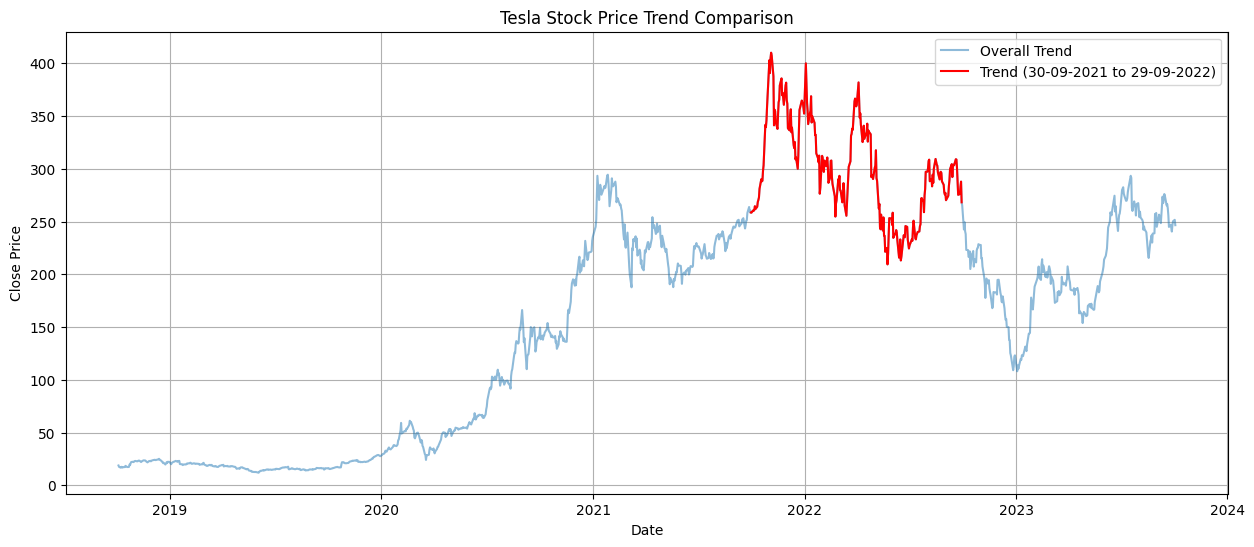

In [2]:
import matplotlib.pyplot as plt
from datetime import datetime

# Convert the 'Date' columns to datetime for accurate filtering
tesla_stock_data['Date'] = pd.to_datetime(tesla_stock_data['Date'], format='%m/%d/%Y')

# Convert 'Close/Last' prices to numeric values for the entire dataset
tesla_stock_data['Close/Last'] = tesla_stock_data['Close/Last'].str.replace('$', '').astype(float)

# Filter the data for the date range 30-09-2021 to 29-09-2022
start_date = datetime(2021, 9, 30)
end_date = datetime(2022, 9, 29)
tesla_stock_filtered = tesla_stock_data[(tesla_stock_data['Date'] >= start_date) & (tesla_stock_data['Date'] <= end_date)]

# Plotting the overall trend and the trend within the specified date range
plt.figure(figsize=(15, 6))
plt.plot(tesla_stock_data['Date'], tesla_stock_data['Close/Last'], label='Overall Trend', alpha=0.5)
plt.plot(tesla_stock_filtered['Date'], tesla_stock_filtered['Close/Last'], label='Trend (30-09-2021 to 29-09-2022)', color='red')
plt.title('Tesla Stock Price Trend Comparison')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

In [3]:
tesla_stock_price = stock_price_data[stock_price_data['Stock Name']=='TSLA']
tesla_stock_price.set_index('Date', inplace = True)
display(Markdown('### Descriptive Statistics of Stock Price Data'))
tesla_stock_price.describe()

### Descriptive Statistics of Stock Price Data

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,300.295542,307.656601,292.253823,299.864947,299.864947,8.058207e+07
std,46.161120,46.804121,44.718813,45.812123,45.812123,2.549115e+07
min,207.949997,217.973328,206.856674,209.386673,209.386673,3.504270e+07
25%,266.860825,273.241661,260.780823,267.203331,267.203331,6.242468e+07
50%,298.750000,304.158325,289.565002,296.856659,296.856659,7.710210e+07
75%,335.700005,344.957512,327.908340,336.472504,336.472504,9.351338e+07
max,411.470001,414.496674,405.666656,409.970001,409.970001,1.885563e+08


<center>
    <h2 style="color: #333; font-family: Arial, sans-serif;">🔍 <u>Our Findings</u> 📊</h2>
</center>

- **Total Records:** `252 rows/records`

- **Close Price Analysis:**
  - **Range:** `$209 - $410`
  - **Average:** `$300`
  - 📈 *Insight*: The close price indicates a moderate volatility in the stock.

- **Daily Highs Analysis:**
  - **Range:** `$218 - $414.49`
  - **Average:** `$308`
  - 🌟 *Insight*: Higher daily highs suggest moments of investor optimism.

- **Daily Lows Analysis:**
  - **Range:** `$207 - $405.66`
  - **Average:** `$292`
  - 📉 *Insight*: Daily lows provide a safety net level for the stock.

- **Daily Opens Analysis:**
  - **Range:** `$208 - $411.47`
  - **Average:** `$300`
  - 🚀 *Insight*: Opening prices are consistent with the overall average, indicating stable market openings.


<center>
    <h2 style="color: #4A90E2; font-family: 'Trebuchet MS', sans-serif;">
        📅 <u>Daily</u> | <u>Weekly</u> | <u>Monthly</u> 📈
    </h2>
    <h3 style="color: #333; font-family: 'Verdana', sans-serif;">
        Visualization of Stock Price Movement 🚀📊
    </h3>
</center>


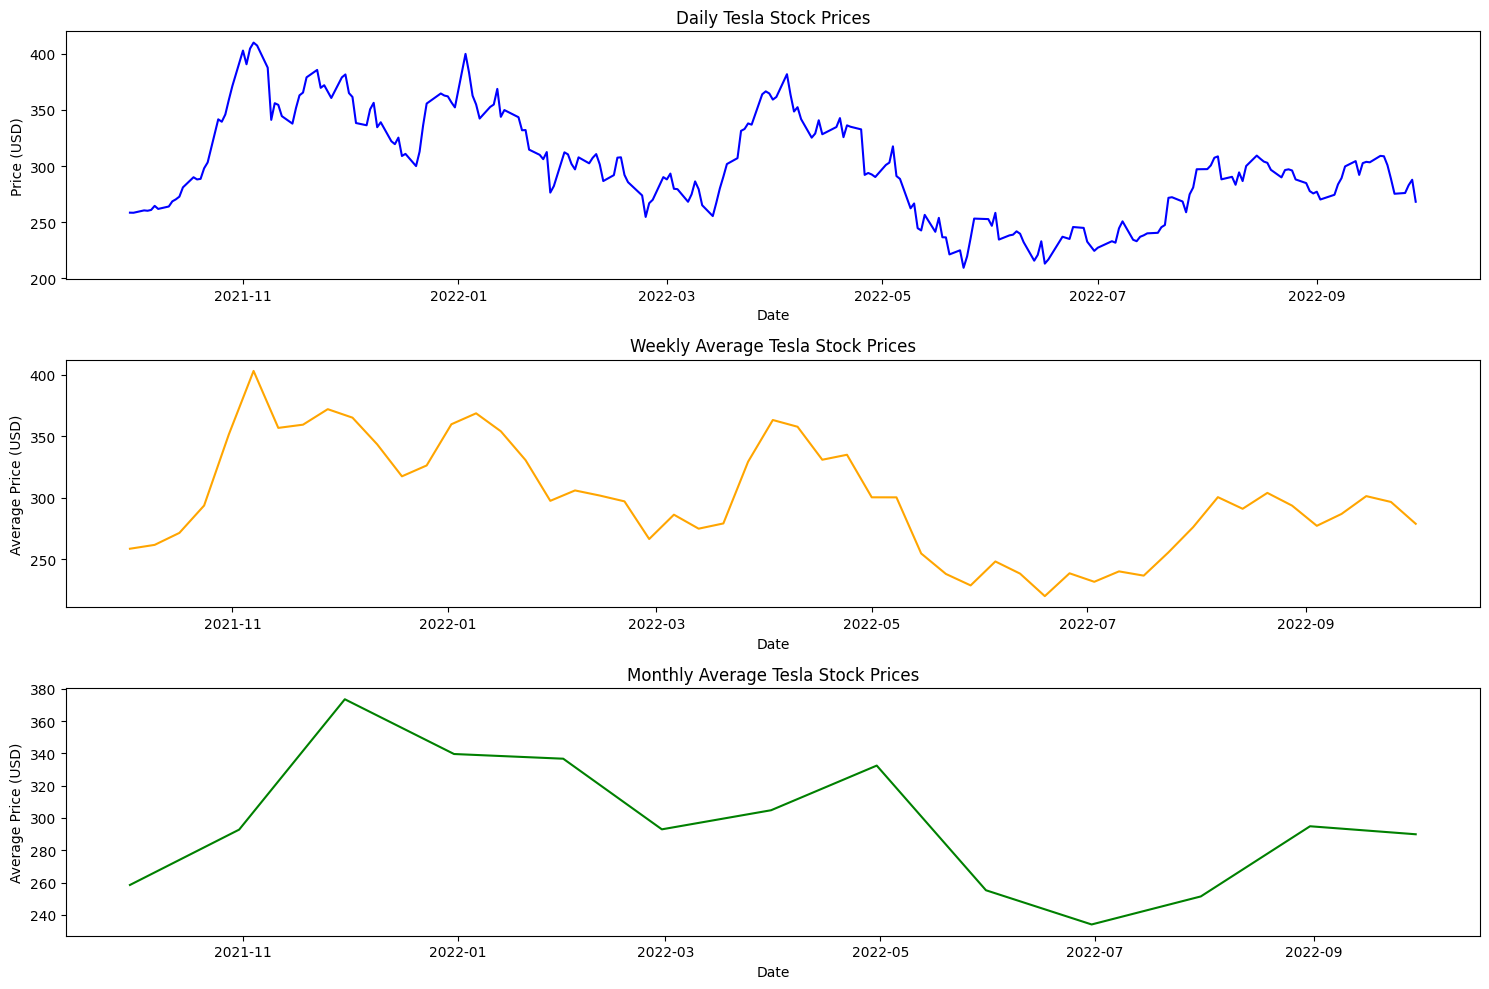

In [4]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

tesla_stock_price = tesla_stock_price.reset_index()

# Convert 'Date' to datetime
tesla_stock_price['Date'] = pd.to_datetime(tesla_stock_price['Date'])

# Sort the dataframe by date
tesla_stock_price.sort_values('Date', inplace=True)

# Resampling to get weekly and monthly averages for Close price
weekly_avg_xlsx = tesla_stock_price.resample('W', on='Date')['Close'].mean()
monthly_avg_xlsx = tesla_stock_price.resample('M', on='Date')['Close'].mean()

# Plotting
plt.figure(figsize=(15, 10))

# Daily prices
plt.subplot(3, 1, 1)
plt.plot(tesla_stock_price['Date'], tesla_stock_price['Close'], label='Daily Closing Price', color='blue')
plt.title('Daily Tesla Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')

# Weekly average prices
plt.subplot(3, 1, 2)
plt.plot(weekly_avg_xlsx, label='Weekly Average Closing Price', color='orange')
plt.title('Weekly Average Tesla Stock Prices')
plt.xlabel('Date')
plt.ylabel('Average Price (USD)')

# Monthly average prices
plt.subplot(3, 1, 3)
plt.plot(monthly_avg_xlsx, label='Monthly Average Closing Price', color='green')
plt.title('Monthly Average Tesla Stock Prices')
plt.xlabel('Date')
plt.ylabel('Average Price (USD)')

plt.tight_layout()
plt.show()


<center>
    <h2 style="color: orange; font-family: 'Lucida Sans Unicode', sans-serif;">
        🔍 Visualising Behavior of <span style="font-weight: bold;">Volume</span>
    </h2>
    <h3 style="color: #2E86C1; font-family: 'Gill Sans', sans-serif;">
        with <span style="text-decoration: underline;">Weekly Average Closing Price</span> 💹
    </h3>
</center>


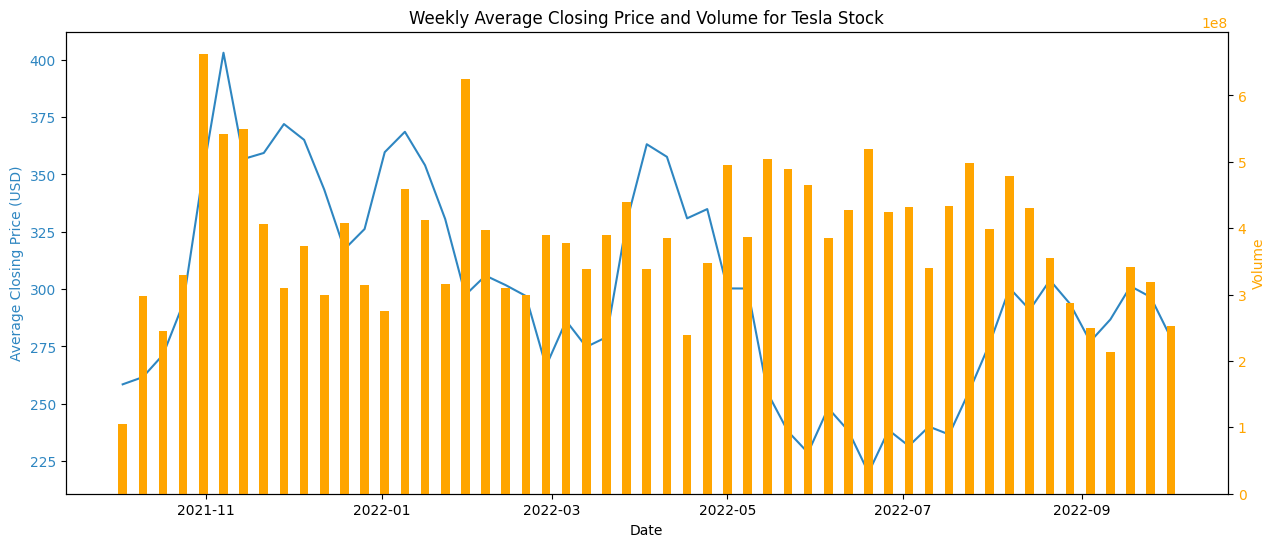

In [5]:
# Resampling to get weekly averages for Close price and total volume
weekly_avg_xlsx = tesla_stock_price.resample('W', on='Date')['Close'].mean()
weekly_volume_xlsx = tesla_stock_price.resample('W', on='Date')['Volume'].sum()

# Plotting weekly volume with close price
plt.figure(figsize=(15, 6))

# Creating a twin axis for volume
ax1 = plt.gca()
ax2 = ax1.twinx()

# Weekly average close price plot
ax1.plot(weekly_avg_xlsx, label='Weekly Average Closing Price', color='#2E86C1')
ax1.set_title('Weekly Average Closing Price and Volume for Tesla Stock')
ax1.set_xlabel('Date')
ax1.set_ylabel('Average Closing Price (USD)', color='#2E86C1')
ax1.tick_params(axis='y', labelcolor='#2E86C1')

# Weekly total volume plot
ax2.bar(weekly_volume_xlsx.index, weekly_volume_xlsx, label='Weekly Total Volume', color='orange', width=3)
ax2.set_ylabel('Volume', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.show()


#### 🌐 **Market Sentiment and Investor Behavior Analysis**
---

**Observation:**
During the period from April 2022 to June 2022, a notable behavior was observed in the context of general market sentiment and investor actions.

- **Bearish Market Influence:** In a bearish market or times of economic uncertainty, trading volumes often increase. This is typically accompanied by a decline in stock prices as investors tend to shift away from riskier assets, including stocks.

- **Impact on Stock Prices:** The increased volume in this scenario does not indicate a positive trend but rather a mass movement away from equities, which can lead to falling prices.

- **April 2022 to June 2022 Analysis:** This period might have experienced such a market sentiment, where the increased trading volume was more reflective of a cautious or negative investor outlook, leading to a decrease in stock prices.

---

*This analysis helps in understanding the intricate relationship between market sentiments, investor behavior, and their collective impact on stock market dynamics.*


<a id='eda-twitter'></a>
## 🐦 EDA on Twitter Data

In [6]:
display(Markdown('### Tweet Data'))
display(stock_tweets_data.head())

### Tweet Data

,Date,Tweet,Stock Name,Company Name
0,2022-09-29 23:41:16+00:00,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc."
1,2022-09-29 23:24:43+00:00,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc."
2,2022-09-29 23:18:08+00:00,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc."
3,2022-09-29 22:40:07+00:00,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc."
4,2022-09-29 22:27:05+00:00,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc."


<center>
    <h2 style="color: #2E86C1; font-family: 'Lucida Sans Unicode', sans-serif;">
        ⚙️ <u>Feature Engineering</u>|📊 <u>Character Count and Word Count</u>
    </h2>
</center>


In [7]:
tesla_tweets = stock_tweets_data[stock_tweets_data['Stock Name'] == 'TSLA']
tesla_tweets = tesla_tweets.drop(columns = ['Stock Name', 'Company Name'])
tesla_tweets['Date'] = pd.to_datetime(tesla_tweets['Date'])
tesla_tweets['Date'] = pd.to_datetime(tesla_tweets['Date']).dt.date
tesla_tweets.set_index('Date', inplace = True)
# Get average tweet length and average word count 

tesla_tweets_eda = tesla_tweets
tesla_tweets_eda['Length'] = tesla_tweets_eda['Tweet'].apply(len)
tesla_tweets_eda['Word_counts'] = tesla_tweets_eda['Tweet'].apply(lambda x:len(str(x).split()))
display(tesla_tweets_eda)
# Commenting out print statements to better display findings in Markdown
# print("Average tweet length is ", round(tesla_tweets_eda.Length.mean()))
# print("Average word count in tweets is ", round(tesla_tweets_eda.Word_counts.mean()))
# print(f"The largest tweet length is {tesla_tweets_eda['Length'].max()} and the smallest is {tesla_tweets_eda['Length'].min()}")
# print(f"The highest word count in a tweet is {tesla_tweets_eda['Word_counts'].max()} and the smallest is {tesla_tweets_eda['Word_counts'].min()}")

,Tweet,Length,Word_counts
Date,,,
2022-09-29,Mainstream media has done an amazing job at br...,288,49
2022-09-29,Tesla delivery estimates are at around 364k fr...,68,11
2022-09-29,3/ Even if I include 63.0M unvested RSUs as of...,252,47
2022-09-29,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,212,34
2022-09-29,"@RealDanODowd @Tesla Stop trying to kill kids,...",71,12
...,...,...,...
2021-09-30,Playing in the dirt and #chasingsunsets\n@tesl...,93,10
2021-09-30,I agree with @freshjiva that $TSLA ‘s EV busin...,306,52
2021-09-30,Hold. On. Tight. $TSLA,22,4


#### 📊 Twitter Data Analysis: Tweet Length and Word Count

- **Total number of Tweets related to Tesla** `37422`

- **Average Tweet Length:** `163 characters`

- **Average Word Count:** `27 words`

- **Tweet Length Extremes:**
  - **Largest:** `445 characters`
  - **Smallest:** `10 characters`
  
  
- **Word Count Range:**
  - **Highest:** `75 words`
  - **Lowest:** `2 words`


---




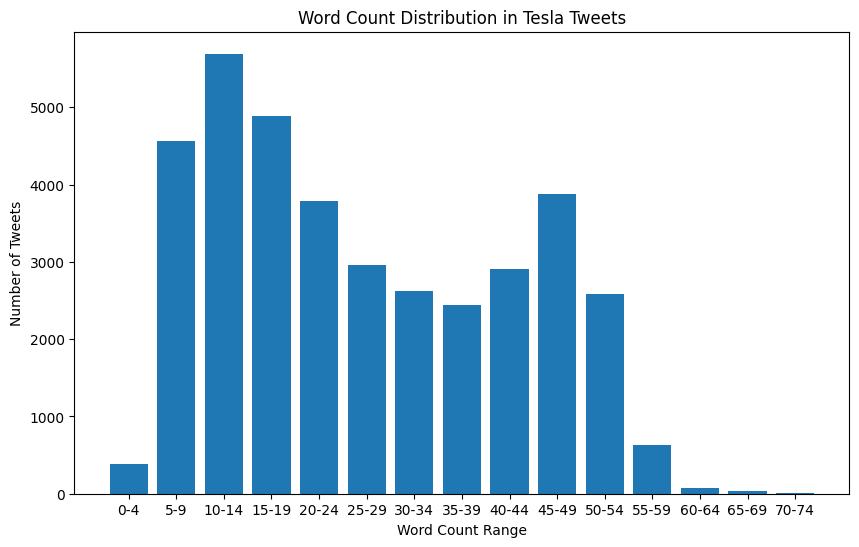

In [8]:
word_count_ranges = [f"{i*5}-{(i+1)*5-1}" for i in range(15)]

# Count the number of tweets in each range
count_per_range = [len(tesla_tweets_eda[(tesla_tweets_eda['Word_counts'] >= i*5) & (tesla_tweets_eda['Word_counts'] < (i+1)*5)]) for i in range(15)]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(word_count_ranges, count_per_range)
plt.xlabel('Word Count Range')
plt.ylabel('Number of Tweets')
plt.title('Word Count Distribution in Tesla Tweets')
plt.show()

<center>
    <h2 style="color: #8E44AD; font-family: 'Arial', sans-serif;">
        ✂️ Separating: <span style="color: #3498DB;">Text</span>, 
        <span style="color: #1ABC9C;">Mentions</span> 📣, 
        and <span style="color: #F1C40F;">Hashtags</span> 🔖
    </h2>
</center>


In [9]:
import re

# Function to extract @mentions and #hashtags
def extract_mentions_hashtags(tweet):
   mentions = re.findall(r'@[\w_]+', tweet)
   hashtags = re.findall(r'#[\w_]+', tweet)
   text = re.sub(r'(@[\w_]+|#[\w_]+)', '', tweet)
   return text, mentions, hashtags
# Apply the function to the 'tweets' column
tesla_tweets_eda[['text', 'mentions', 'hashtags']] = tesla_tweets_eda['Tweet'].apply(extract_mentions_hashtags).apply(pd.Series)

# Print the DataFrame with separated columns
display(tesla_tweets_eda)

,Tweet,Length,Word_counts,text,mentions,hashtags
Date,,,,,,
2022-09-29,Mainstream media has done an amazing job at br...,288,49,Mainstream media has done an amazing job at br...,[@Tesla],[]
2022-09-29,Tesla delivery estimates are at around 364k fr...,68,11,Tesla delivery estimates are at around 364k fr...,[],[]
2022-09-29,3/ Even if I include 63.0M unvested RSUs as of...,252,47,3/ Even if I include 63.0M unvested RSUs as of...,[],[]
2022-09-29,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,212,34,Hahaha why are you still trying to stop Tes...,"[@RealDanODowd, @WholeMarsBlog, @Tesla]",[]
2022-09-29,"@RealDanODowd @Tesla Stop trying to kill kids,...",71,12,"Stop trying to kill kids, you sad deranged o...","[@RealDanODowd, @Tesla]",[]
...,...,...,...,...,...,...
2021-09-30,Playing in the dirt and #chasingsunsets\n@tesl...,93,10,Playing in the dirt and \n https://t.co/JZOA...,"[@tesla, @elonmusk, @TesCalendar]",[#chasingsunsets]
2021-09-30,I agree with @freshjiva that $TSLA ‘s EV busin...,306,52,I agree with that $TSLA ‘s EV business alone ...,[@freshjiva],[]
2021-09-30,Hold. On. Tight. $TSLA,22,4,Hold. On. Tight. $TSLA,[],[]


<center>
    <h2 style="color: #2E86C1; font-family: 'Verdana', sans-serif;">
        ☁️ Wordclouds ☁️
    </h2>
</center>


In [10]:
# from wordcloud import WordCloud
# # Define a function to generate a word cloud from a list of strings
# def generate_word_cloud(data, title):
#    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(data))
#    plt.figure(figsize=(10, 5))
#    plt.imshow(wordcloud, interpolation='bilinear')
#    plt.title(title)
#    plt.axis("off")
#    plt.show()
# # Convert lists in the 'mentions' and 'hashtags' columns to strings
# mentions_as_strings = tesla_tweets_eda['mentions'].apply(lambda x: ' '.join(x))
# hashtags_as_strings = tesla_tweets_eda['hashtags'].apply(lambda x: ' '.join(x))
# # Generate word clouds for the 'mentions' and 'hashtags' columns
# generate_word_cloud(tesla_tweets_eda['text'], "Word Cloud for Text")
# generate_word_cloud(mentions_as_strings, "Word Cloud for Mentions")
# generate_word_cloud(hashtags_as_strings, "Word Cloud for Hashtags")

> There is a need for cleaning data

## Text Cleaning Process

To prepare the text data for analysis, the following cleaning steps are undertaken:

1. **Making Text Lowercase**
2. **Removing Text in Square Brackets**
3. **Removing URLs**
4. **Removing Punctuations**
5. **Removing Special Characters**



<center>
    <h2 style="color: #2E86C1; font-family: 'Verdana', sans-serif;">
        ☁️ Wordcloud for clean text☁️
    </h2>
</center>

In [11]:
# import string 

# def clean_text(text):
#     '''Make text lowercase, remove text in square brackets,remove URL, remove punctuation, remove special characters
#     and remove words containing numbers.'''
#     text = str(text).lower()
#     text = re.sub('\[.*?\]', '', text)
#     text = re.sub(r'http\S+', '', text)
#     text = re.sub('<.*?>+', '', text)
#     text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
#     text = re.sub('\n', '', text)
#     text = re.sub(r'[^A-Za-z0-9\s]+', '', text)
#     return text

# tesla_tweets_eda['text'] = tesla_tweets_eda['text'].apply(lambda x:clean_text(x))

# generate_word_cloud(tesla_tweets_eda['text'], "Word Cloud for clean Text")

In [12]:
# Get average tweet length and average word count after removing special characters

tesla_tweets_eda = tesla_tweets
tesla_tweets_eda['Length'] = tesla_tweets_eda['text'].apply(len)
tesla_tweets_eda['Word_counts'] = tesla_tweets_eda['text'].apply(lambda x:len(str(x).split()))
# print("Average tweet length is ", round(tesla_tweets_eda.Length.mean()))
# print("Average word count in tweets is ", round(tesla_tweets_eda.Word_counts.mean()))
# print(f"The largest tweet length is {tesla_tweets_eda['Length'].max()} and the smallest is {tesla_tweets_eda['Length'].min()}")
# print(f"The highest word count in a tweet is {tesla_tweets_eda['Word_counts'].max()} and the smallest is {tesla_tweets_eda['Word_counts'].min()}")

<center>
    <h2 style="color: #3498DB; font-family: 'Helvetica', sans-serif;">
        📊 <u>Stats Comparison:</u> Original vs Cleaned Tweets 🧹
    </h2>
</center>


|  | Tweets(Original) | Tweets (Clean)|
|---|---|---|
|Average tweet length | 163 | 127|
|Average word count | 27 | 23 |
|The largest tweet length | 445 | 287 |
|The smallest tweet length | 10 | 6 |
|The highest word count in a tweet| 75 | 61 |
|The lowest word count in a tweet | 2 | 1 |

<center>
    <h2 style="color: #2ECC71; font-family: 'Arial', sans-serif;">
        🏆 <u>Most Common Words</u> in Focus 🌟
    </h2>
</center>


In [13]:
from collections import Counter

tesla_tweets_eda['tokens'] = tesla_tweets_eda['text'].apply(lambda x:str(x).split())
top = Counter([item for sublist in tesla_tweets_eda['tokens'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,$TSLA,26704
1,the,26396
2,to,22383
3,a,15499
4,and,13935
5,of,13480
6,is,13050
7,in,12888
8,for,9126
9,I,8426


**Removing Stopwords**

In [14]:
custom_stopwords = ['stock','tslaq','teslas','tsla','tesla','elon','musk','elonmusk', 'teslas', 'elons', 'musks','elonmusks', 'amp','twtr','twitter','teslaq','since','amzn','x', 'we', 'our', 'some', 'any', 'your', 'such', 'but', 'her', 'again', "that'll", 'and', 'where', 'ourselves', "haven't", "should've", 'ma', 'shan', 'or', 'off', 'other', 'wouldn', 'before', "you'll", 'a', 'by', 'through', 'my', 'once', 'ain', 'myself', 'being', 'hers', 'been', 'below', 'can', 'do', 't', 'for', 'am', 'will', 'these', 'theirs', 'into', 'was', 'should', 'few', 'it', 'yourself', 'which', 'its', 'themselves', 'his', 'll', 'so', 'an', 'you', 's', 'own', "she's", 'while', 'him', 'doing', 'why', 'all', "you'd", 'what', 'had', 'most', 'were', 'are', 'the', 'there', 'at', 'just', 'after', 'that', 'from', 'here', 'does', 'to', 'both', 'very', 'in', 'aren', 'then', 'has', 'same', 'if', 'under', 'up', "you've", 'because', 'too', 'those', 'how','have', 'o', 'i', "it's", 'y', 'with','above', 'further', 'against', 'on', 'than', 'during', 'their', 'having', 'did', 'out', "you're", 'who', 'over', 'nor', 'now', 're', 'no', 'down', 'me', 'this', 'each', 'until', 'yours', 'don', 'herself', 'itself', 'when', 'more', 'didn', 'd', 'she', 'only', 'as', 'is', 'them', 'about', 'they', 'won', 'of', 'himself', 'm', 'between', 'he', 'whom', 'be', 've', 'ours', 'yourselves']

# We added manually till 'x' and then removed from the existing list #

def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in custom_stopwords]
    return ' '.join(filtered_words)

tesla_tweets_eda['filtered_text'] = tesla_tweets_eda['text'].apply(remove_stopwords)

tesla_tweets_eda['tokens'] = tesla_tweets_eda['filtered_text'].apply(lambda x:str(x).split())

top = Counter([item for sublist in tesla_tweets_eda['tokens'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp = temp.iloc[1:,:]
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Purples')


,Common_words,count
1,-,3849
2,$tsla,2941
3,not,2468
4,&,2454
5,like,1988
6,get,1589
7,Model,1563
8,would,1535
9,see,1475
10,new,1466


<center>
    <h2 style="color: #3498DB; font-family: 'Comic Sans MS', cursive;">
        📚 <u>Bi-grams Analysis</u>: Unveiling Word Pairs 🧩
    </h2>
</center>


In [15]:
# from nltk.util import ngrams

# # Assuming tesla_tweets_eda['tokens'] is a list of lists (each list contains tokens of a tweet)
# bi_grams = [gram for tokens in tesla_tweets_eda['tokens'] if len(tokens) >= 2 for gram in ngrams(tokens, 2)]


# # Count frequencies
# bi_gram_freq = Counter(bi_grams)

# # Display most common bi-grams
# print("Most Common Bi-grams:")
# for gram, freq in bi_gram_freq.most_common(10):  # Adjust the number as needed
#     print(f"{gram}: {freq}")


# # Function to convert n-grams to a format suitable for word clouds
# def grams_to_wordcloud_format(gram_freq):
#     return ' '.join(['_'.join(gram) for gram in gram_freq])

# # Create word clouds
# bi_gram_cloud = WordCloud(width=800, height=400, background_color = 'white').generate(grams_to_wordcloud_format(bi_gram_freq))


# # Display word clouds
# plt.figure(figsize=(10, 5))
# plt.imshow(bi_gram_cloud, interpolation='bilinear')
# plt.axis('off')
# plt.title('Bi-gram Word Cloud')
# plt.show()



<center>
    <h2 style="color: #2ECC71; font-family: 'Comic Sans MS', cursive;">
        🔍 <u>Tri-grams Exploration</u>: Discovering Word Triplets 🔗
    </h2>
</center>


In [16]:
# tri_grams = [gram for tokens in tesla_tweets_eda['tokens'] if len(tokens) >= 3 for gram in ngrams(tokens, 3)]

# tri_gram_freq = Counter(tri_grams)
# # Display most common tri-grams
# print("\nMost Common Tri-grams:")
# for gram, freq in tri_gram_freq.most_common(10):  # Adjust the number as needed
#     print(f"{gram}: {freq}")
    
# tri_gram_cloud = WordCloud(width=800, height=400, background_color = 'white').generate(grams_to_wordcloud_format(tri_gram_freq))
# plt.figure(figsize=(10, 5))
# plt.imshow(tri_gram_cloud, interpolation='bilinear')
# plt.axis('off')
# plt.title('Tri-gram Word Cloud')
# plt.show()


<center>
    <h2 style="color: #3498DB; font-family: 'Helvetica', sans-serif;">
        📊 <u>Stats Comparison:</u> Original vs Cleaned vs Final
    </h2>
</center>

In [17]:
tesla_tweets_eda["filtered_text_length"] = tesla_tweets_eda["filtered_text"].apply(lambda x: len(str(x).split()))
# df_tweet["filtered_text_length"].describe()

## Final Stats Comparison

- **Original**: 'original' represents the original dataset.
- **Clean**: 'clean' refers to the data after removing mentions and hashtags and applying basic cleaning.
- **Final**: 'final' is the data after applying stopwords removal to the 'clean' dataset.


|                                 | Tweets (Original) | Tweets (Clean) | Tweet (Final) |
|---------------------------------|-------------------|----------------|---------------|
| Average Word Count              | 27                | 23             | 12            |
| The Highest Word Count in a Tweet | 75                | 61             | 42            |
| The Lowest Word Count in a Tweet | 02                | 01             | 00            |


In [18]:
print(f"No. of tweets left with zero words after cleaning: {len(tesla_tweets_eda[tesla_tweets_eda['filtered_text_length']<1])}")
print(f"No. of tweets left with one words after cleaning: {len(tesla_tweets_eda[tesla_tweets_eda['filtered_text_length']==1])}")

No. of tweets left with zero words after cleaning: 1
No. of tweets left with one words after cleaning: 39


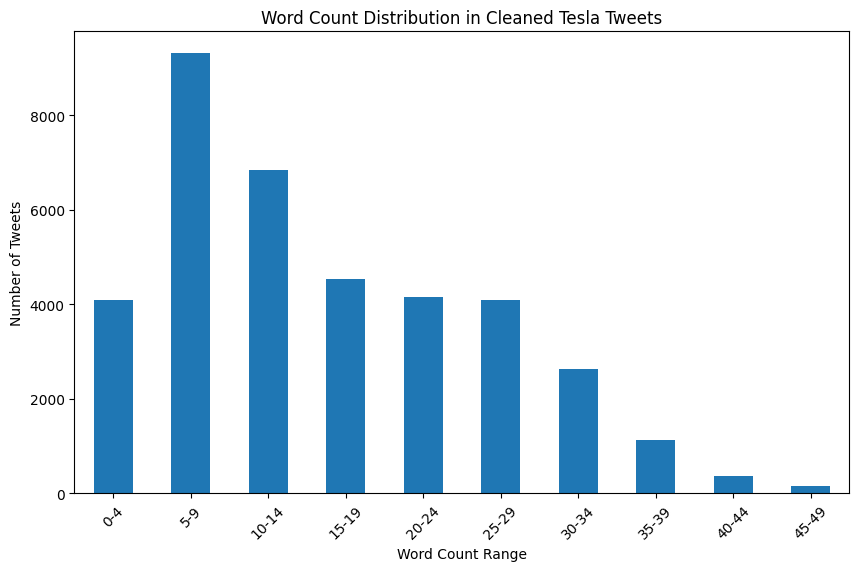

In [19]:
# Define the bin edges and labels
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
labels = [f"{i}-{i+4}" for i in bins[:-1]]

# Use pd.cut to bin the 'filtered_text_length' column
binned_data = pd.cut(tesla_tweets_eda['filtered_text_length'], bins=bins, labels=labels)

# Calculate the value counts for each bin
value_counts = binned_data.value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar')
plt.xlabel('Word Count Range')
plt.ylabel('Number of Tweets')
plt.title('Word Count Distribution in Cleaned Tesla Tweets')
plt.xticks(rotation=45)
plt.show()

<center>
    <h2 style="color: #3498DB; font-family: 'Lucida Grande', sans-serif;">
        🔢 Checking Presence of Numeric Data
    </h2>
</center>


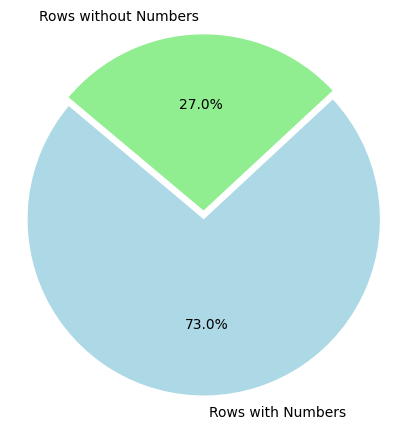

In [20]:
import matplotlib.pyplot as plt

rows_with_numbers = tesla_tweets_eda[tesla_tweets_eda['Tweet'].apply(lambda x: any(char.isdigit() for char in str(x)))]
count_rows_with_numbers = len(rows_with_numbers)
total_rows = len(tesla_tweets_eda)
percent_with_numbers = (count_rows_with_numbers / total_rows) * 100
rows_without_numbers = total_rows - count_rows_with_numbers

# Data for plotting
labels = ['Rows with Numbers', 'Rows without Numbers']
sizes = [count_rows_with_numbers, rows_without_numbers]
colors = ['lightblue', 'lightgreen']
explode = (0.05, 0)  # "explode" the 1st slice (Rows with Numbers)

# Creating the pie chart
plt.figure(figsize=(5, 5))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

> The percentage is significant hence we can't think of removing numeric data

<a id='eda-merged'></a>
## ➕ Analysis on Tweet and Stock Data combined
---
#### Getting Tweet count for each date in our date range

In [21]:
tesla_tweets.reset_index(inplace = True)
tesla_tweets_count = tesla_tweets
tesla_tweets_count['Date'] = pd.to_datetime(tesla_tweets['Date']).dt.date
# Set the 'Date' column as the index
tesla_tweets.set_index('Date', inplace=True)
# Count the number of tweets per date
tweet_counts = tesla_tweets_count.groupby('Date').size().reset_index(name='Tweet Count')
tweet_counts['Date'] = pd.to_datetime(tweet_counts['Date'])
# Merge stock and tweet data based on the Date index
merged_data = tesla_stock_price.merge(tweet_counts, on='Date', how='inner')
# Sort the data by Date
merged_data.sort_values(by='Date', inplace=True)
merged_data = merged_data.set_index("Date")
display(merged_data)

,Open,High,Low,Close,Adj Close,Volume,Stock Name,Tweet Count
Date,,,,,,,,
2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,TSLA,90
2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200,TSLA,94
2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900,TSLA,119
2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800,TSLA,88
2021-10-06,258.733337,262.220001,257.739990,260.916656,260.916656,43898400,TSLA,78
...,...,...,...,...,...,...,...,...
2022-09-23,283.089996,284.500000,272.820007,275.329987,275.329987,63748400,TSLA,86
2022-09-26,271.829987,284.089996,270.309998,276.010010,276.010010,58076900,TSLA,72
2022-09-27,283.839996,288.670013,277.510010,282.940002,282.940002,61925200,TSLA,85


In [22]:
# Creating a 'year_week' column
merged_data["year_week"] = merged_data.index.isocalendar().year.astype(str) + "-" + merged_data.index.isocalendar().week.astype(str)

# Grouping by 'year_week' and summing 'TweetCount' and 'Volume'
weekly_data = merged_data.groupby("year_week")[["Tweet Count", "Volume"]].sum()

## Weekly distribution of Tweet Counts

<Axes: xlabel='year_week', ylabel='Tweet Count'>

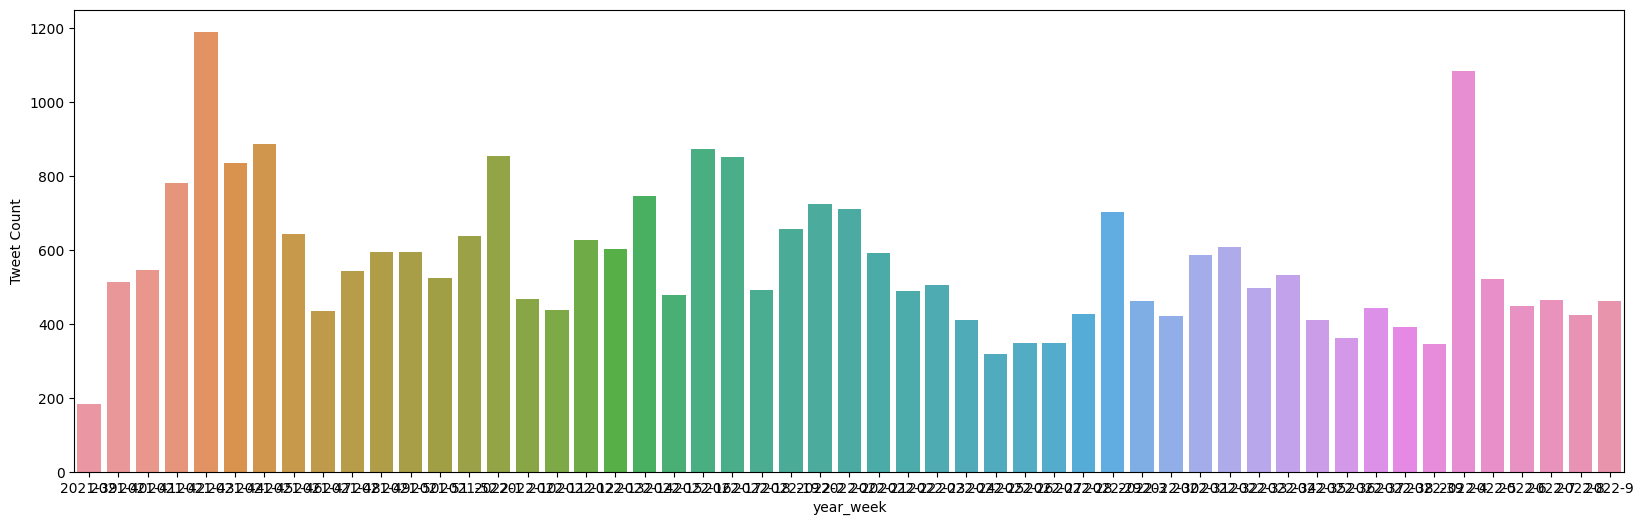

In [23]:
plt.figure(figsize=(20,6))
sns.barplot(data=weekly_data, x=weekly_data.index, y="Tweet Count")

## Weekly distribution of Volume

<Axes: xlabel='year_week', ylabel='Volume'>

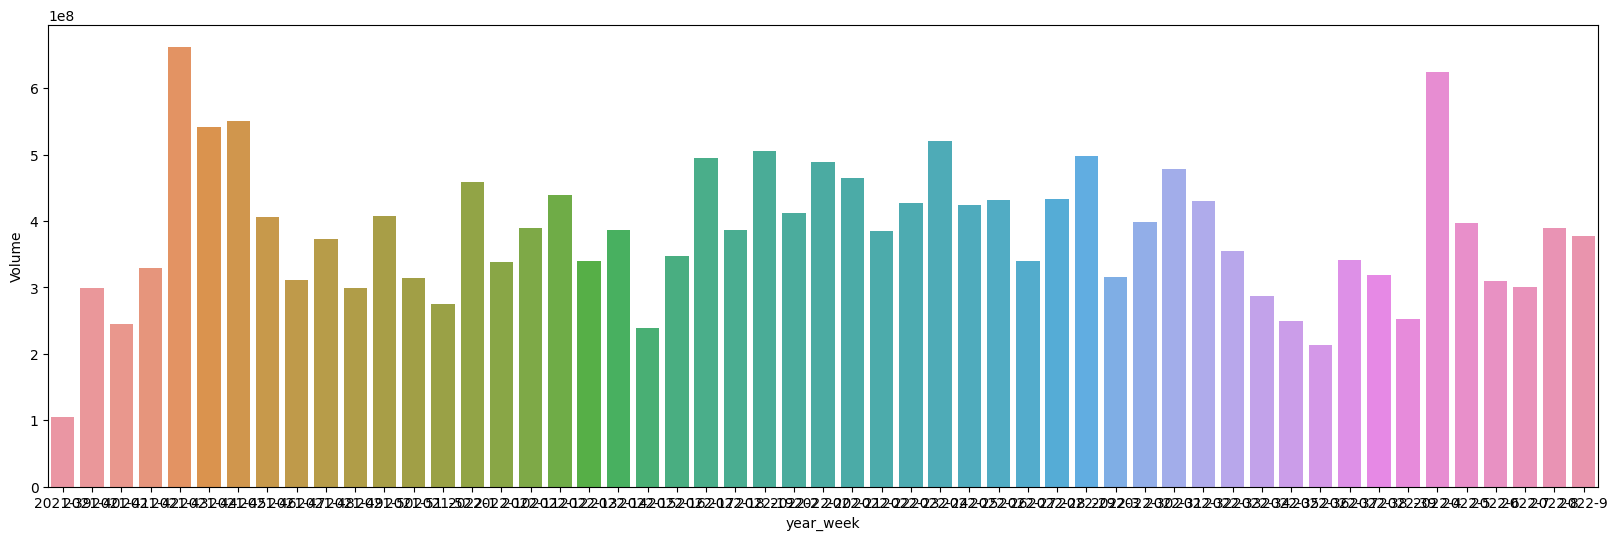

In [24]:
plt.figure(figsize=(20,6))
sns.barplot(data=weekly_data, x=weekly_data.index, y="Volume")

<a id='hypothesis-tests'></a>
## 🔍 Hypothesis Tests
---

### Granularity: Daily

> Null hypothesis: The Volume of stocks traded is not correlated with the number of tweets in a period of time.

> Alternate hypothesis: The volume of stocks traded is positively correlated with the number of tweets in a period of time.

Pearson Correlation Coefficient: 0.5138682724660827
p_score:2.1991888881219254e-18
Reject the null hypothesis: The volume of stocks traded is positively correlated with the number of tweets.


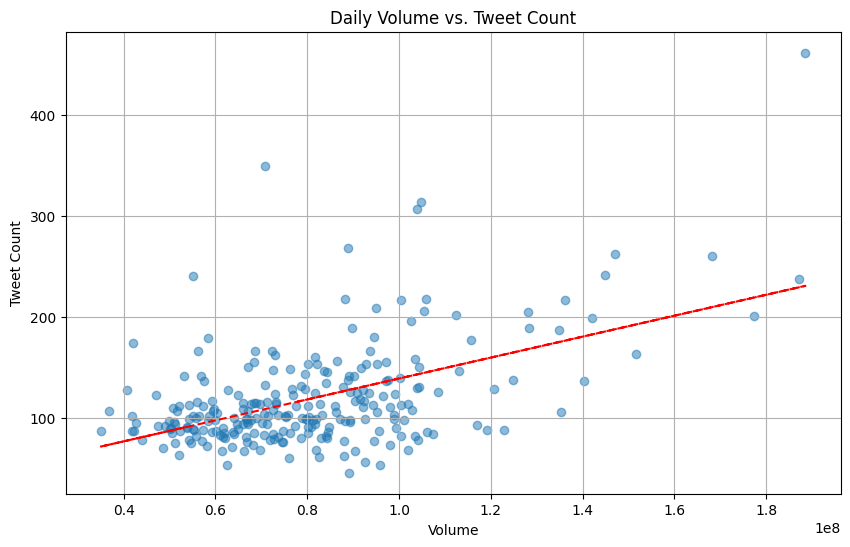

In [25]:
from scipy.stats import pearsonr

# Calculate Pearson correlation coefficient and p-value between Daily Volume and TweetCount
corr, p_value = pearsonr(merged_data['Volume'], merged_data['Tweet Count'])
alpha = 0.05
print(f"Pearson Correlation Coefficient: {corr}")
print(f"p_score:{p_value}")
if p_value < alpha:
   print("Reject the null hypothesis: The volume of stocks traded is positively correlated with the number of tweets.")
else:
   print("Fail to reject the null hypothesis: There is no significant correlation between the volume of stocks traded and the number of tweets on monthly basis.")

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Volume'], merged_data['Tweet Count'], alpha=0.5)
plt.title("Daily Volume vs. Tweet Count")
plt.xlabel("Volume")
plt.ylabel("Tweet Count")
plt.grid(True)
# Add a trendline (optional)
z = np.polyfit(merged_data['Volume'], merged_data['Tweet Count'], 1)
p = np.poly1d(z)
plt.plot(merged_data['Volume'], p(merged_data['Volume']), "r--")
# Show the plot
plt.show()



### Granularity: Weekly

> Null hypothesis: The Volume of stocks traded is not correlated with the number of tweets in a period of time.

> Alternate hypothesis: The volume of stocks traded is positively correlated with the number of tweets in a period of time.

Pearson Correlation Coefficient: 0.6739327795174416
p_score:3.181993295448152e-08
Reject the null hypothesis: The volume of stocks traded is positively correlated with the number of tweets.


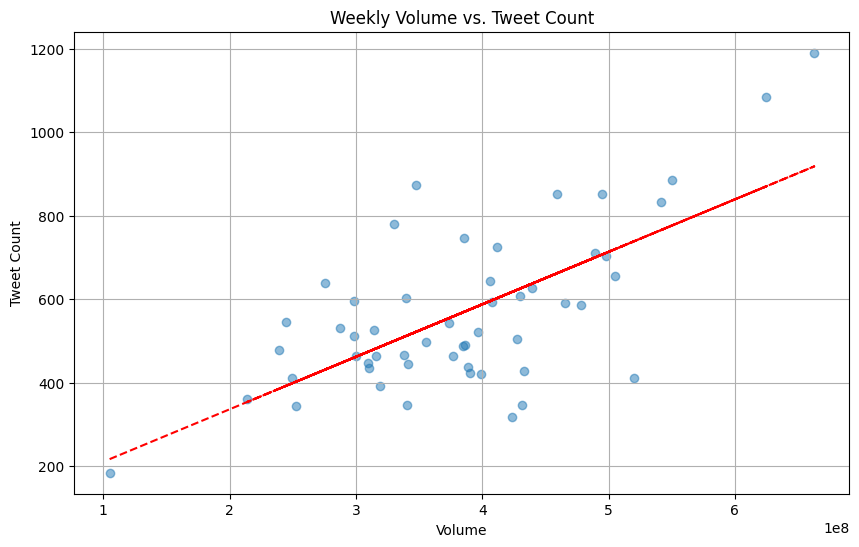

In [26]:
# Assuming merged_data is your DataFrame and its index is a DatetimeIndex
merged_data["week of year"] = merged_data.index.isocalendar().week

# Grouping by 'week of year' and summing 'TweetCount' and 'Volume'
weekly_data = merged_data.groupby("week of year")[["Tweet Count", "Volume"]].sum()

# Creating a 'year_week' column
merged_data["year_week"] = merged_data.index.isocalendar().year.astype(str) + "-" + merged_data.index.isocalendar().week.astype(str)

# Grouping by 'year_week' and summing 'TweetCount' and 'Volume'
weekly_data = merged_data.groupby("year_week")[["Tweet Count", "Volume"]].sum()
import seaborn as sns

# Calculate Pearson correlation coefficient and p-value between weeklyVolume and TweetCount
corr, p_value = pearsonr(weekly_data['Volume'], weekly_data['Tweet Count'])
alpha = 0.05
print(f"Pearson Correlation Coefficient: {corr}")
print(f"p_score:{p_value}")
if p_value < alpha:
   print("Reject the null hypothesis: The volume of stocks traded is positively correlated with the number of tweets.")
else:
   print("Fail to reject the null hypothesis: There is no significant correlation between the volume of stocks traded and the number of tweets on monthly basis.")

# plt.figure(figsize=(10, 6))
# sns.scatterplot(data=weekly_data, x='Volume', y='Tweet Count', alpha=0.5)
# sns.regplot(data=weekly_data, x='Volume', y='Tweet Count', scatter=False, color='red', line_kws={'linestyle':'--'})
# plt.title("Weekly Volume vs. Tweet Count")
# plt.grid(True)
# plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(weekly_data['Volume'], weekly_data['Tweet Count'], alpha=0.5)
plt.title("Weekly Volume vs. Tweet Count")
plt.xlabel("Volume")
plt.ylabel("Tweet Count")
plt.grid(True)
# Add a trendline (optional)
z = np.polyfit(weekly_data['Volume'], weekly_data['Tweet Count'], 1)
p = np.poly1d(z)
plt.plot(weekly_data['Volume'], p(weekly_data['Volume']), "r--")
# Show the plot
plt.show()

### Granularity: Monthly

> Null hypothesis: The Volume of stocks traded is not correlated with the number of tweets in a period of time.

> Alternate hypothesis: The volume of stocks traded is positively correlated with the number of tweets in a period of time.

Pearson Correlation Coefficient: 0.2708901435837131
p_score:0.3944226702539212
Fail to reject the null hypothesis: There is no significant correlation between the volume of stocks traded and the number of tweets on monthly basis.


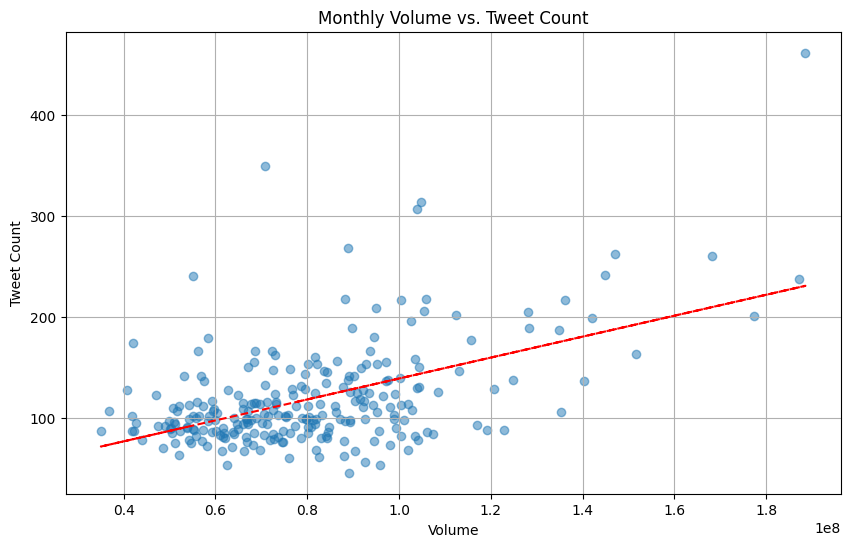

In [27]:
merged_data['month'] = merged_data.index.month
merged_data["month"] = merged_data.index.month
monthly_tweet_counts = merged_data.groupby("month")[["Tweet Count", "Volume"]].sum()
# Calculate Pearson correlation coefficient and p-value between monthly Volume and TweetCount
corr, p_value = pearsonr(monthly_tweet_counts['Volume'], monthly_tweet_counts['Tweet Count'])
alpha = 0.05
print(f"Pearson Correlation Coefficient: {corr}")
print(f"p_score:{p_value}")
if p_value < alpha:
   print("Reject the null hypothesis: The volume of stocks traded is positively correlated with the number of tweets.")
else:
   print("Fail to reject the null hypothesis: There is no significant correlation between the volume of stocks traded and the number of tweets on monthly basis.")

# plt.figure(figsize=(10, 6))
# sns.scatterplot(data=merged_data, x='Volume', y='Tweet Count', alpha=0.5)
# sns.regplot(data=merged_data, x='Volume', y='Tweet Count', scatter=False, color='red', line_kws={'linestyle':'--'})
# plt.title("Monthly Volume vs. Tweet Count")
# plt.grid(True)
# plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Volume'], merged_data['Tweet Count'], alpha=0.5)
plt.title("Monthly Volume vs. Tweet Count")
plt.xlabel("Volume")
plt.ylabel("Tweet Count")
plt.grid(True)
# Add a trendline (optional)
z = np.polyfit(merged_data['Volume'], merged_data['Tweet Count'], 1)
p = np.poly1d(z)
plt.plot(merged_data['Volume'], p(merged_data['Volume']), "r--")
# Show the plot
plt.show()

<center>
    <h2 style="color: #27AE60; font-family: 'Arial', sans-serif;">
        🌟 <u>Final Conclusion:</u> Correlation Between Average Weekly Stock Price and Tweet Count
    </h2>
</center>

After thorough analysis, we have uncovered a **strong positive correlation** between weekly data trends and tweet counts. This suggests a significant and consistent alignment in how weekly events are reflected in social media activities.

---

<span style="font-style: italic; color: #34495E;">
    Thus, while analysing sentiments we will keep the granularity of our data weekly
</span>


Aggregating tweets weekly

In [28]:
tesla_tweets

,Tweet,Length,Word_counts,text,mentions,hashtags,tokens,filtered_text,filtered_text_length
Date,,,,,,,,,
2022-09-29,Mainstream media has done an amazing job at br...,282,48,Mainstream media has done an amazing job at br...,[@Tesla],[],"[Mainstream, media, done, amazing, job, brainw...",Mainstream media done amazing job brainwashing...,28
2022-09-29,Tesla delivery estimates are at around 364k fr...,68,11,Tesla delivery estimates are at around 364k fr...,[],[],"[delivery, estimates, around, 364k, analysts.,...",delivery estimates around 364k analysts. $tsla,6
2022-09-29,3/ Even if I include 63.0M unvested RSUs as of...,252,47,3/ Even if I include 63.0M unvested RSUs as of...,[],[],"[3/, Even, include, 63.0M, unvested, RSUs, 6/3...","3/ Even include 63.0M unvested RSUs 6/30, addi...",32
2022-09-29,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,179,31,Hahaha why are you still trying to stop Tes...,"[@RealDanODowd, @WholeMarsBlog, @Tesla]",[],"[Hahaha, still, trying, stop, FSD, bro!, Get, ...",Hahaha still trying stop FSD bro! Get shit tog...,22
2022-09-29,"@RealDanODowd @Tesla Stop trying to kill kids,...",52,10,"Stop trying to kill kids, you sad deranged o...","[@RealDanODowd, @Tesla]",[],"[Stop, trying, kill, kids,, sad, deranged, old...","Stop trying kill kids, sad deranged old man",8
...,...,...,...,...,...,...,...,...,...
2021-09-30,Playing in the dirt and #chasingsunsets\n@tesl...,51,6,Playing in the dirt and \n https://t.co/JZOA...,"[@tesla, @elonmusk, @TesCalendar]",[#chasingsunsets],"[Playing, dirt, https://t.co/JZOAFjV2zP]",Playing dirt https://t.co/JZOAFjV2zP,3
2021-09-30,I agree with @freshjiva that $TSLA ‘s EV busin...,296,51,I agree with that $TSLA ‘s EV business alone ...,[@freshjiva],[],"[agree, $TSLA, ‘s, EV, business, alone, worth,...",agree $TSLA ‘s EV business alone worth &gt; $1...,33
2021-09-30,Hold. On. Tight. $TSLA,22,4,Hold. On. Tight. $TSLA,[],[],"[Hold., On., Tight., $TSLA]",Hold. On. Tight. $TSLA,4


# Getting Sentiments

In [29]:
tesla_tweets_sentiment = tesla_tweets.drop(columns = ["Length", "Word_counts", "text", "mentions", "hashtags", "tokens", "filtered_text", "filtered_text_length"])

In [30]:
tesla_tweets_sentiment.head()

,Tweet
Date,
2022-09-29,Mainstream media has done an amazing job at br...
2022-09-29,Tesla delivery estimates are at around 364k fr...
2022-09-29,3/ Even if I include 63.0M unvested RSUs as of...
2022-09-29,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...
2022-09-29,"@RealDanODowd @Tesla Stop trying to kill kids,..."


In [31]:
tesla_tweets_sentiment["sentiment_score"] = ''
tesla_tweets_sentiment["Negative"] = ''
tesla_tweets_sentiment["Neutral"] = ''
tesla_tweets_sentiment["Positive"] = ''
tesla_tweets_sentiment.head()

,Tweet,sentiment_score,Negative,Neutral,Positive
Date,,,,,
2022-09-29,Mainstream media has done an amazing job at br...,,,,
2022-09-29,Tesla delivery estimates are at around 364k fr...,,,,
2022-09-29,3/ Even if I include 63.0M unvested RSUs as of...,,,,
2022-09-29,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,,,,
2022-09-29,"@RealDanODowd @Tesla Stop trying to kill kids,...",,,,


In [32]:
pip install twython

Note: you may need to restart the kernel to use updated packages.


In [33]:
import unicodedata
from nltk.sentiment import SentimentIntensityAnalyzer

sentiment_analyzer = SentimentIntensityAnalyzer()
for indx, row in tesla_tweets_sentiment.iterrows():
    try:
        sentence_i = unicodedata.normalize('NFKD', row['Tweet'])
        sentence_sentiment = sentiment_analyzer.polarity_scores(sentence_i)
        tesla_tweets_sentiment.at[indx, 'sentiment_score'] = sentence_sentiment['compound']
#         tesla_tweets_sentiment.at[indx, 'Negative'] = sentence_sentiment['neg']
#         tesla_tweets_sentiment.at[indx, 'Neutral'] = sentence_sentiment['neu']
#         tesla_tweets_sentiment.at[indx, 'Positive'] = sentence_sentiment['pos']
    except TypeError:
        print(row['Tweet'])
        print(indx)
        break

In [34]:
# Display a sample of the DataFrame with wrapped text
display(tesla_tweets_sentiment[['Tweet', "sentiment_score","Negative","Neutral","Positive"]].sample(5))

,Tweet,sentiment_score,Negative,Neutral,Positive
Date,,,,,
2022-01-02,Q4 numbers are making me hard $TSLA,0.1027,,,
2021-12-06,"I'm feeling bullish about Q4, in case you were...",0.6486,,,
2022-05-11,It's all algo trading right now. That is why t...,0.0772,,,
2021-11-25,Guess that rules out China exporting in Decemb...,0.4738,,,
2021-12-07,"""Tesla will have over 1 million robotaxis on t...",0.6369,,,


In [35]:
tesla_tweets_sentiment_text = tesla_tweets.drop(columns = ["Length", "Word_counts", "Tweet", "mentions", "hashtags", "tokens", "filtered_text", "filtered_text_length"])

In [36]:
tesla_tweets_sentiment_text["sentiment_score"] = ''
tesla_tweets_sentiment_text["Negative"] = ''
tesla_tweets_sentiment_text["Neutral"] = ''
tesla_tweets_sentiment_text["Positive"] = ''
tesla_tweets_sentiment_text.head()

,text,sentiment_score,Negative,Neutral,Positive
Date,,,,,
2022-09-29,Mainstream media has done an amazing job at br...,,,,
2022-09-29,Tesla delivery estimates are at around 364k fr...,,,,
2022-09-29,3/ Even if I include 63.0M unvested RSUs as of...,,,,
2022-09-29,Hahaha why are you still trying to stop Tes...,,,,
2022-09-29,"Stop trying to kill kids, you sad deranged o...",,,,


In [37]:
# import unicodedata
# from nltk.sentiment import SentimentIntensityAnalyzer

# sentiment_analyzer = SentimentIntensityAnalyzer()
# for indx, row in tesla_tweets_sentiment_text.iterrows():
#     try:
#         sentence_i = unicodedata.normalize('NFKD', row['text'])
#         sentence_sentiment = sentiment_analyzer.polarity_scores(sentence_i)
#         tesla_tweets_sentiment_text.at[indx, 'sentiment_score'] = sentence_sentiment['compound']
#         tesla_tweets_sentiment_text.at[indx, 'Negative'] = sentence_sentiment['neg']
#         tesla_tweets_sentiment_text.at[indx, 'Neutral'] = sentence_sentiment['neu']
#         tesla_tweets_sentiment_text.at[indx, 'Positive'] = sentence_sentiment['pos']
#     except TypeError:
#         print(row['text'])
#         print(indx)
#         break

In [38]:
# Display a sample of the DataFrame with wrapped text
display(tesla_tweets_sentiment_text[['text', "sentiment_score","Negative","Neutral","Positive"]].sample(5))

,text,sentiment_score,Negative,Neutral,Positive
Date,,,,,
2022-02-11,I predict that $TSLA will rise above Gold and ...,,,,
2021-11-18,So far the Apple Car seems like an absolute di...,,,,
2022-01-04,$TSLA needs to hold 1119 support. A close abov...,,,,
2022-02-25,MM's will go for the $850 calls today. All the...,,,,
2022-01-27,That's a forward P/E of 55 $tsla\n\nFrom P/E 1...,,,,


In [39]:
tweets = pd.DataFrame({'Tweet':tesla_tweets['Tweet']})

In [40]:
display(tweets)

,Tweet
Date,
2022-09-29,Mainstream media has done an amazing job at br...
2022-09-29,Tesla delivery estimates are at around 364k fr...
2022-09-29,3/ Even if I include 63.0M unvested RSUs as of...
2022-09-29,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...
2022-09-29,"@RealDanODowd @Tesla Stop trying to kill kids,..."
...,...
2021-09-30,Playing in the dirt and #chasingsunsets\n@tesl...
2021-09-30,I agree with @freshjiva that $TSLA ‘s EV busin...
2021-09-30,Hold. On. Tight. $TSLA


In [41]:
import pandas as pd

# Assuming tweets is your DataFrame with 'Date' and 'Tweet' columns

# Add blank 'Sentiment' and 'Comments' columns
tweets['Sentiment'] = ''
tweets['Comments'] = ''

# Names for the files
names = ['Aarohi', 'Ajay', 'Amima', 'Kallal', 'Nehan', 'Rupam', 'Vinayaka', 'Zishan']

# Number of tweets per person
tweets_per_person = 50

# Store the DataFrames for each person
individual_dfs = []

# Splitting and saving the DataFrame
for name in names:
    # Randomly select tweets
    selected_tweets = tweets.sample(tweets_per_person)

    # Append to individual DataFrames list
    individual_dfs.append(selected_tweets)

    # Save individual CSV file
    file_name = f'{name}.csv'
    selected_tweets.to_csv(file_name, index=False)
    print(f"Saved {file_name}")

# Combine all individual DataFrames and remove duplicates
combined_selected_tweets = pd.concat(individual_dfs).drop_duplicates()

# Save the combined DataFrame to a CSV file
combined_file_name = 'combined_selected_tweets.csv'
combined_selected_tweets.to_csv(combined_file_name, index=False)
print(f"Saved {combined_file_name}")


Saved Aarohi.csv
Saved Ajay.csv
Saved Amima.csv
Saved Kallal.csv
Saved Nehan.csv
Saved Rupam.csv
Saved Vinayaka.csv
Saved Zishan.csv
Saved combined_selected_tweets.csv


In [42]:
import emoji

def extract_emojis(text):
    return ''.join(c for c in text if c in emoji.EMOJI_DATA)

# Assuming 'tweets' is your DataFrame and it has a column named 'Tweet'
tweets['Emojis'] = tweets['Tweet'].apply(extract_emojis)

# Now, 'tweets' DataFrame will have an additional column 'Emojis' containing extracted emojis


In [43]:
tweets.sample(10)

,Tweet,Sentiment,Comments,Emojis
Date,,,,
2021-10-23,"One day, Tesla cars will have a built-in starl...",,,
2022-04-21,My portfolio right now.\n\n$PLTR $TSLA https:/...,,,
2022-01-25,"$TSLA usually sells off after earnings, Wall S...",,,
2021-11-05,"$TSLA Model 3 now costs $8,000 more than it di...",,,
2022-08-22,Saudi Aramco made more profit last quarter tha...,,,🤯
2022-09-03,Spread the word! There will likely be another...,,,
2022-02-18,People have to stop the negative attacks on fe...,,,
2021-11-15,If @elonmusk ends up being the catalyst that m...,,,
2022-05-26,What a relaxing day at Spa. Had drinks and pam...,,,


In [44]:
# Function to convert a single emoji to its word description
def emoji_to_word(emoji_char):
    return emoji.demojize(emoji_char, language='alias').replace(':', '').replace('_', ' ')

# Assuming 'tweets' is your DataFrame and it has a column named 'Emojis'
tweets['Emoji_Words'] = tweets['Emojis'].apply(lambda e: ' '.join(emoji_to_word(char) for char in e))

# Now, 'tweets' DataFrame will have an additional column 'Emoji_Words' containing emoji descriptions


In [45]:
tweets.sample(10)

,Tweet,Sentiment,Comments,Emojis,Emoji_Words
Date,,,,,
2022-04-01,Plenty of M3s available at Hertz FLL airport. ...,,,,
2022-05-09,"Putting money to work. Doubling down. Well, as...",,,,
2021-12-22,2/ There seems to be a second Form 4 missing i...,,,,
2021-10-16,"All joking aside, Herbert Diess inviting Elon ...",,,,
2022-08-08,UPDATE: Our @tesla Model S LR that was rented ...,,,🥲,smiling face with tear
2021-10-16,BTW the yoke makes a lot more sense when you’r...,,,,
2021-11-01,$tsla is unbelievable. Almost 94 rsi but just ...,,,,
2022-01-19,Q: SpaceX or $TSLA?\nA: Both https://t.co/Iy3n...,,,,
2022-09-29,"How are those Model S ""boats"" doing, Mr. Fraud...",,,,


In [46]:
tweets_embedding = pd.DataFrame(tesla_tweets['filtered_text'])

In [47]:
tweets_embedding

,filtered_text
Date,
2022-09-29,Mainstream media done amazing job brainwashing...
2022-09-29,delivery estimates around 364k analysts. $tsla
2022-09-29,"3/ Even include 63.0M unvested RSUs 6/30, addi..."
2022-09-29,Hahaha still trying stop FSD bro! Get shit tog...
2022-09-29,"Stop trying kill kids, sad deranged old man"
...,...
2021-09-30,Playing dirt https://t.co/JZOAFjV2zP
2021-09-30,agree $TSLA ‘s EV business alone worth &gt; $1...
2021-09-30,Hold. On. Tight. $TSLA


In [48]:
# import nltk
# import subprocess

# # Download and unzip wordnet
# try:
#     nltk.data.find('wordnet.zip')
# except:
#     nltk.download('wordnet', download_dir='/kaggle/working/')
#     command = "unzip /kaggle/working/corpora/wordnet.zip -d /kaggle/working/corpora"
#     subprocess.run(command.split())
#     nltk.data.path.append('/kaggle/working/')

# # Now you can import the NLTK resources as usual
# from nltk.corpus import wordnet
# from nltk.stem import WordNetLemmatizer

In [49]:
# import pandas as pd
# import gensim
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from nltk.corpus import stopwords
# from nltk.stem import WordNetLemmatizer
# import re


# # Preprocessing
# stop_words = set(stopwords.words('english'))
# lemmatizer = WordNetLemmatizer()

# def preprocess(text):
#     text = re.sub(r'http\S+', '', text)  # Remove URLs
#     words = text.lower().split()
#     words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
#     return words

# tweets_embedding['processed'] = tweets_embedding['filtered_text'].apply(preprocess)

# # Load a pre-trained Word2Vec model (for example, Google's model)
# word2vec_model = gensim.models.KeyedVectors.load_word2vec_format('/Users/zishan/Downloads/GoogleNews-vectors-negative300.bin', binary=True)

# # Vectorize tweets
# def vectorize_tweet(tweet):
#     vector = [word2vec_model[word] for word in tweet if word in word2vec_model]
#     return np.mean(vector, axis=0) if vector else np.zeros(300)

# tweets_embedding['vector'] = tweets_embedding['processed'].apply(vectorize_tweet)

# # Further steps would involve sentiment analysis model training and evaluation


In [50]:
tweets_embedding

,filtered_text
Date,
2022-09-29,Mainstream media done amazing job brainwashing...
2022-09-29,delivery estimates around 364k analysts. $tsla
2022-09-29,"3/ Even include 63.0M unvested RSUs 6/30, addi..."
2022-09-29,Hahaha still trying stop FSD bro! Get shit tog...
2022-09-29,"Stop trying kill kids, sad deranged old man"
...,...
2021-09-30,Playing dirt https://t.co/JZOAFjV2zP
2021-09-30,agree $TSLA ‘s EV business alone worth &gt; $1...
2021-09-30,Hold. On. Tight. $TSLA


In [51]:
# Try different encodings if 'latin1' doesn't work
# Common alternatives include 'ISO-8859-1', 'cp1252', 'utf-16', etc.
encoding = 'latin1'

# Update the file path if necessary
file_path = '/kaggle/input/combined-manual-tweets-sentiment/matched_tweets.csv'

try:
    combined_tweets = pd.read_csv(file_path, encoding=encoding)
except UnicodeDecodeError as e:
    print(f"Error with encoding {encoding}: {e}")
    # You can add more attempts with different encodings here


In [52]:
combined_tweets.shape

(375, 2)

In [53]:
combined_tweets.sample(10)

,Tweet,Sentiment
67,Ã°ÂÂÂ¨BREAKING!Ã°ÂÂÂ¨\n\n$800 resistance h...,1
37,I regret that I have never factored in the ear...,0
109,"Going to be 105ÃÂ° F (40.5ÃÂ°C) in Austin, T...",1
165,"The price of shares may fall today, but in the...",1
2,TESLA SHARES MOVE LOWER; LAST DOWN 1.4% PREMAR...,-1
16,$TSLA -3.6% to $674 pre-mkt. Equities gave bac...,-1
136,(BONUS): Historically $TSLA fell ~30%-45% in t...,-1
220,My staff just reminded me tesla is in tequila ...,-1
232,"2/ On the following Mon 4/5, $TSLA +4.4% vs ND...",1
152,"$TSLA Raised to 'Street High' $2,300 at Global...",1


In [54]:
import pandas as pd

# Assuming combined_tweets and tesla_tweets_sentiment are your DataFrames

# Merge the DataFrames on the 'Tweet' column
merged_df = pd.merge(combined_tweets, tesla_tweets_sentiment[['Tweet', 'sentiment_score']], on='Tweet', how='inner')

# 'how' can be 'inner', 'outer', 'left', or 'right' depending on how you want to merge
# 'inner' will keep only the rows that have matching values in both DataFrames
# 'left' will keep all rows from the first DataFrame and add matching rows from the second
# 'right' and 'outer' can be used similarly

# Now, merged_df contains columns from both DataFrames, matched by the 'Tweet' column


In [55]:
merged_df3 = pd.merge(combined_tweets, tesla_tweets_sentiment[['Tweet', 'sentiment_score']], on='Tweet', how='left')

In [56]:
merged_df3['sentiment_score'].isna().value_counts()

sentiment_score
False    229
True     149
Name: count, dtype: int64

In [57]:
merged_df3.to_csv("cheat.csv", index=True)

In [58]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# Ensure you have the VADER lexicon downloaded
# nltk.download('vader_lexicon')

# # Load your DataFrame (replace 'your_file.csv' with the path to your CSV file)
# merged_df3 = pd.read_csv('your_file.csv')

# Initialize the Sentiment Intensity Analyzer
sia = SentimentIntensityAnalyzer()

# Define a function to get sentiment score
def get_sentiment_score(tweet):
    return sia.polarity_scores(tweet)['compound']

# Apply the sentiment score function to the 'Tweet' column for NaN values in 'sentiment_score'
merged_df3.loc[merged_df3['sentiment_score'].isna(), 'sentiment_score'] = merged_df3['Tweet'].apply(get_sentiment_score)

# # Save the updated DataFrame to a new CSV file (optional)
# merged_df3.to_csv('updated_file.csv', index=False)


In [59]:
# merged_df = merged_df.drop(columns = 'Comments')

In [60]:
merged_df3

,Tweet,Sentiment,sentiment_score
0,DO YOU WANT $DOGE TO BE ACCEPTED BY @Tesla SOO...,1,0.9345
1,Tesla $TSLA AI Day has been moved to September...,0,0.0
2,TESLA SHARES MOVE LOWER; LAST DOWN 1.4% PREMAR...,-1,0.9325
3,Wow! big scoop from @ErikSchatzker.\n\nHertz i...,1,0.0
4,@RealDanODowd @nytimes @Tesla @RealDawnProject...,-1,0.6908
...,...,...,...
373,$GME 1 min candles. Short bias several large e...,1,0.0
374,*TESLA: JPMORGAN RAISES TARGET PRICE TO $215 F...,1,0.0
375,Rumor is that $TSLA hits a new ATH when I reac...,0,-0.4215
376,$tsla just the beginning https://t.co/cqDNwwMFUT,0,0.4019


In [61]:
merged_df['Sentiment'].isna().value_counts()

Sentiment
False    229
Name: count, dtype: int64

In [62]:
# Normalize sentiment_score
merged_df3['normalized_sentiment_score'] = merged_df3['sentiment_score'].apply(lambda x: 1 if x > 0 else (-1 if x < 0 else 0))

# Create a match column
def sentiment_match(row):
    if row['Sentiment'] == 1 and row['normalized_sentiment_score'] == 1:
        return 1
    elif row['Sentiment'] == -1 and row['normalized_sentiment_score'] == -1:
        return 1
    elif row['Sentiment'] == 0 and row['normalized_sentiment_score'] == 0:
        return 1
    else:
        return 0

merged_df3['sentiment_match'] = merged_df3.apply(sentiment_match, axis=1)

# Calculate match percentage
match_percentage = (merged_df3['sentiment_match'].sum() / len(merged_df3)) * 100

print(f"Match Percentage: {match_percentage}%")


Match Percentage: 40.476190476190474%


In [63]:
merged_df3

,Tweet,Sentiment,sentiment_score,normalized_sentiment_score,sentiment_match
0,DO YOU WANT $DOGE TO BE ACCEPTED BY @Tesla SOO...,1,0.9345,1,1
1,Tesla $TSLA AI Day has been moved to September...,0,0.0,0,1
2,TESLA SHARES MOVE LOWER; LAST DOWN 1.4% PREMAR...,-1,0.9325,1,0
3,Wow! big scoop from @ErikSchatzker.\n\nHertz i...,1,0.0,0,0
4,@RealDanODowd @nytimes @Tesla @RealDawnProject...,-1,0.6908,1,0
...,...,...,...,...,...
373,$GME 1 min candles. Short bias several large e...,1,0.0,0,0
374,*TESLA: JPMORGAN RAISES TARGET PRICE TO $215 F...,1,0.0,0,0
375,Rumor is that $TSLA hits a new ATH when I reac...,0,-0.4215,-1,0
376,$tsla just the beginning https://t.co/cqDNwwMFUT,0,0.4019,1,0


In [64]:
gpt_sentiments = pd.read_csv('/kaggle/input/gpt-sentiment-and-relevance-scores/updated_tesla_tweets_with_scores.csv')

In [65]:
gpt_sentiments

,Date,Tweet,Sentiment Score,Relevance Score
0,2022-09-29 23:41:16+00:00,Mainstream media has done an amazing job at br...,0.097627,0.353443
1,2022-09-29 23:24:43+00:00,Tesla delivery estimates are at around 364k fr...,0.430379,0.204917
2,2022-09-29 23:18:08+00:00,3/ Even if I include 63.0M unvested RSUs as of...,0.205527,0.030418
3,2022-09-29 22:40:07+00:00,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,0.089766,0.651322
4,2022-09-29 22:27:05+00:00,"@RealDanODowd @Tesla Stop trying to kill kids,...",-0.152690,0.932983
...,...,...,...,...
37417,2021-09-30 02:52:38+00:00,Playing in the dirt and #chasingsunsets\n@tesl...,0.042025,0.090437
37418,2021-09-30 02:40:26+00:00,I agree with @freshjiva that $TSLA ‘s EV busin...,-0.200974,0.533782
37419,2021-09-30 01:59:02+00:00,Hold. On. Tight. $TSLA,-0.762861,0.880311
37420,2021-09-30 01:38:26+00:00,Get ready for a $TSLA _ _ _ _ _ _ Q3 delivery...,0.735031,0.639520


In [66]:
merged_df2 = pd.merge(combined_tweets, gpt_sentiments[['Tweet', 'Sentiment Score']], on='Tweet', how='left')

In [67]:
merged_df2


,Tweet,Sentiment,Sentiment Score
0,DO YOU WANT $DOGE TO BE ACCEPTED BY @Tesla SOO...,1,NaN
1,Tesla $TSLA AI Day has been moved to September...,0,NaN
2,TESLA SHARES MOVE LOWER; LAST DOWN 1.4% PREMAR...,-1,-0.820341
3,Wow! big scoop from @ErikSchatzker.\n\nHertz i...,1,-0.631053
4,@RealDanODowd @nytimes @Tesla @RealDawnProject...,-1,-0.455189
...,...,...,...
373,$GME 1 min candles. Short bias several large e...,1,0.299972
374,*TESLA: JPMORGAN RAISES TARGET PRICE TO $215 F...,1,-0.100367
375,Rumor is that $TSLA hits a new ATH when I reac...,0,0.420041
376,$tsla just the beginning https://t.co/cqDNwwMFUT,0,-0.678278


In [68]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# Ensure you have the VADER lexicon downloaded
# nltk.download('vader_lexicon')

# # Load your DataFrame (replace 'your_file.csv' with the path to your CSV file)
# merged_df3 = pd.read_csv('your_file.csv')

# Initialize the Sentiment Intensity Analyzer
sia = SentimentIntensityAnalyzer()

# Define a function to get sentiment score
def get_sentiment_score(tweet):
    return sia.polarity_scores(tweet)['compound']

# Apply the sentiment score function to the 'Tweet' column for NaN values in 'sentiment_score'
merged_df2.loc[merged_df2['Sentiment Score'].isna(), 'Sentiment Score'] = merged_df2['Tweet'].apply(get_sentiment_score)

# # Save the updated DataFrame to a new CSV file (optional)
# merged_df3.to_csv('updated_file.csv', index=False)

In [69]:
merged_df2.shape

(378, 3)

In [70]:
# Normalize sentiment_score
merged_df2['normalized_sentiment_score'] = merged_df2['Sentiment Score'].apply(lambda x: 1 if x > 0 else (-1 if x < 0 else 0))

# Create a match column
def sentiment_match(row):
    if row['Sentiment'] == 1 and row['normalized_sentiment_score'] == 1:
        return 1
    elif row['Sentiment'] == -1 and row['normalized_sentiment_score'] == -1:
        return 1
    elif row['Sentiment'] == 0 and row['normalized_sentiment_score'] == 0:
        return 1
    else:
        return 0

merged_df2['sentiment_match'] = merged_df2.apply(sentiment_match, axis=1)

# Calculate match percentage
match_percentage = (merged_df2['sentiment_match'].sum() / len(merged_df2)) * 100

print(f"Match Percentage: {match_percentage}%")

Match Percentage: 39.682539682539684%


In [71]:
merged_df2

,Tweet,Sentiment,Sentiment Score,normalized_sentiment_score,sentiment_match
0,DO YOU WANT $DOGE TO BE ACCEPTED BY @Tesla SOO...,1,0.934500,1,1
1,Tesla $TSLA AI Day has been moved to September...,0,0.000000,0,1
2,TESLA SHARES MOVE LOWER; LAST DOWN 1.4% PREMAR...,-1,-0.820341,-1,1
3,Wow! big scoop from @ErikSchatzker.\n\nHertz i...,1,-0.631053,-1,0
4,@RealDanODowd @nytimes @Tesla @RealDawnProject...,-1,-0.455189,-1,1
...,...,...,...,...,...
373,$GME 1 min candles. Short bias several large e...,1,0.299972,1,1
374,*TESLA: JPMORGAN RAISES TARGET PRICE TO $215 F...,1,-0.100367,-1,0
375,Rumor is that $TSLA hits a new ATH when I reac...,0,0.420041,1,0
376,$tsla just the beginning https://t.co/cqDNwwMFUT,0,-0.678278,-1,0


In [72]:
gpt_sentiments

,Date,Tweet,Sentiment Score,Relevance Score
0,2022-09-29 23:41:16+00:00,Mainstream media has done an amazing job at br...,0.097627,0.353443
1,2022-09-29 23:24:43+00:00,Tesla delivery estimates are at around 364k fr...,0.430379,0.204917
2,2022-09-29 23:18:08+00:00,3/ Even if I include 63.0M unvested RSUs as of...,0.205527,0.030418
3,2022-09-29 22:40:07+00:00,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,0.089766,0.651322
4,2022-09-29 22:27:05+00:00,"@RealDanODowd @Tesla Stop trying to kill kids,...",-0.152690,0.932983
...,...,...,...,...
37417,2021-09-30 02:52:38+00:00,Playing in the dirt and #chasingsunsets\n@tesl...,0.042025,0.090437
37418,2021-09-30 02:40:26+00:00,I agree with @freshjiva that $TSLA ‘s EV busin...,-0.200974,0.533782
37419,2021-09-30 01:59:02+00:00,Hold. On. Tight. $TSLA,-0.762861,0.880311
37420,2021-09-30 01:38:26+00:00,Get ready for a $TSLA _ _ _ _ _ _ Q3 delivery...,0.735031,0.639520


In [73]:
merged_df.sample(10)

,Tweet,Sentiment,sentiment_score
55,$TSLA is worth $70 Billion more than it was 5 ...,1,0.4588
19,I regret that I have never factored in the ear...,0,0.4404
151,"BREAKING: About 6,850 @Tesla Model Ys spotted ...",1,0.0
56,$TSLA getting hammered into the close. Got som...,-1,0.0
142,Now I can make a million or more in a single d...,1,0.3818
2,@RealDanODowd @nytimes @Tesla @RealDawnProject...,-1,0.6908
185,"This is the season for stock splits, with prox...",1,0.9625
27,"10k steps a day, \n16h fast a day,\n8h sleep a...",0,0.8553
118,Is it just me or is AI Day 2022 the least hype...,1,0.0
212,I know that Elon doesn't like Tim Cook but Coo...,-1,0.0


In [74]:
merged_df.to_csv("final.csv", index=True)

In [75]:
tesla_tweets_sentiment.to_csv("final.csv", index=True)

In [76]:
merged_df.head(11)

,Tweet,Sentiment,sentiment_score
0,TESLA SHARES MOVE LOWER; LAST DOWN 1.4% PREMAR...,-1,0.9325
1,Wow! big scoop from @ErikSchatzker.\n\nHertz i...,1,0.0
2,@RealDanODowd @nytimes @Tesla @RealDawnProject...,-1,0.6908
3,$TSLA This whale caught the EXACT top of the s...,1,0.6369
4,@garyblack00 Best $TSLA analysis on Twitter. H...,1,0.5704
5,Ppl are misunderstanding him. He will not sell...,0,0.8968
6,"$TSLA max pain for tomorrow is $1,000",0,0.5423
7,$TSLA\nInvestors spent $5.11 billion on call o...,1,-0.4005
8,"At this rate, we may see $1000 or under by the...",-1,0.8553
9,@unusual_whales hey whales. the bot flagged th...,1,-0.4005


In [77]:
merged_data
merged_data['Price_Day_Change']=merged_data['Open']- merged_data['Close']



In [78]:
merged_data=merged_data.drop(columns='Stock Name')

In [79]:
tesla_tweets_sentiment

,Tweet,sentiment_score,Negative,Neutral,Positive
Date,,,,,
2022-09-29,Mainstream media has done an amazing job at br...,0.5994,,,
2022-09-29,Tesla delivery estimates are at around 364k fr...,0.5994,,,
2022-09-29,3/ Even if I include 63.0M unvested RSUs as of...,0.5994,,,
2022-09-29,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,0.5994,,,
2022-09-29,"@RealDanODowd @Tesla Stop trying to kill kids,...",0.5994,,,
...,...,...,...,...,...
2021-09-30,Playing in the dirt and #chasingsunsets\n@tesl...,0.659,,,
2021-09-30,I agree with @freshjiva that $TSLA ‘s EV busin...,0.659,,,
2021-09-30,Hold. On. Tight. $TSLA,0.659,,,


In [80]:
stock_df = pd.DataFrame(merged_data[['Close', 'Price_Day_Change']])

In [81]:
tesla_tweets_sentiment.reset_index(inplace = True)

In [82]:
tesla_tweets_sentiment.dtypes

Date               object
Tweet              object
sentiment_score    object
Negative           object
Neutral            object
Positive           object
dtype: object

In [83]:
tesla_tweets_sentiment['Date'] = pd.to_datetime(tesla_tweets_sentiment['Date'], format='%m/%d/%Y')

In [84]:
tesla_tweets_sentiment['sentiment_score'] = tesla_tweets_sentiment['sentiment_score'].astype(float)

In [85]:
temp_df = tesla_tweets_sentiment.groupby([tesla_tweets_sentiment['Date']])['sentiment_score'].mean()

In [86]:
temp_df = pd.DataFrame(temp_df)

In [87]:
merged_data.shape

(252, 11)

In [88]:
# Calculate the daily price change in percentage
merged_data['Daily Change (%) Close - Close'] = merged_data['Close'].pct_change() * 100

In [89]:
merged_data['Daily Change (%) Close - Open '] = ((merged_data['Close'] - merged_data['Open'])/merged_data['Open']).shift(1)

In [90]:
final_df = merged_data.join(temp_df, how="left", on="Date")
print(final_df.shape)

(252, 14)


In [91]:
final_df = final_df[['Close', 'Price_Day_Change', 'sentiment_score', 'Daily Change (%) Close - Close', 'Daily Change (%) Close - Open ' ]]

In [92]:
final_df = final_df.dropna()

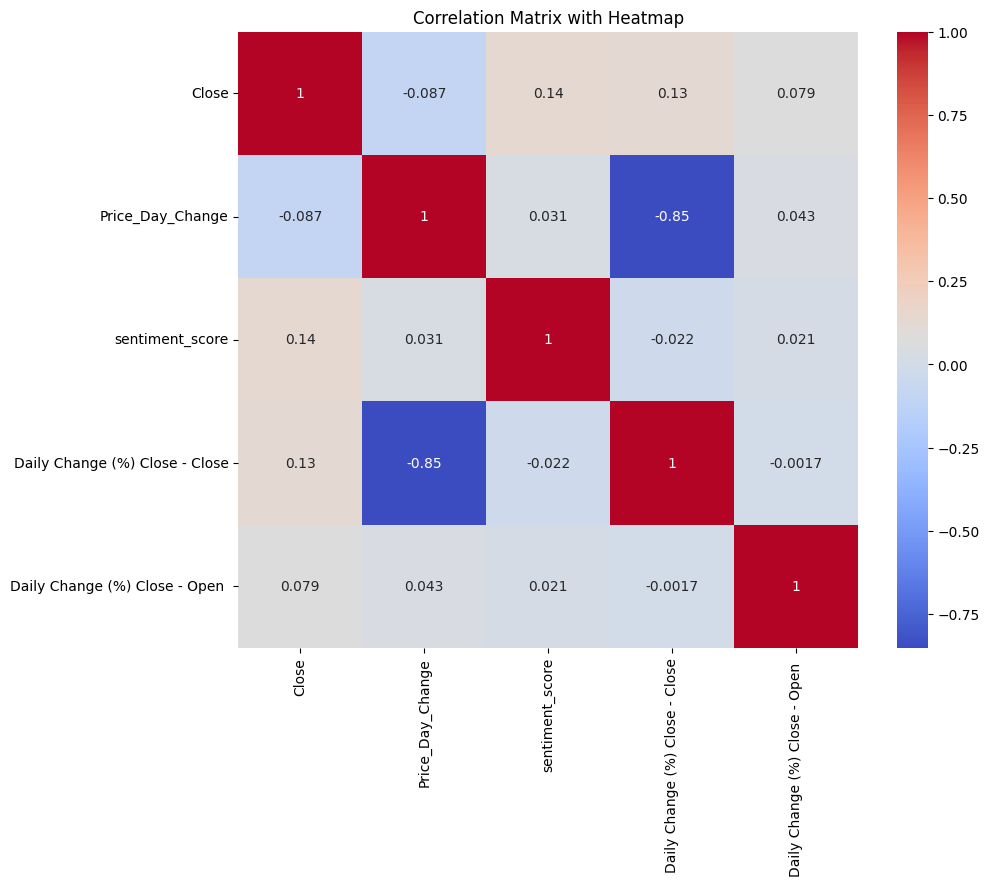

(                                   Close  Price_Day_Change  sentiment_score  \
 Close                           1.000000         -0.087145         0.137806   
 Price_Day_Change               -0.087145          1.000000         0.030942   
 sentiment_score                 0.137806          0.030942         1.000000   
 Daily Change (%) Close - Close  0.130146         -0.851572        -0.022365   
 Daily Change (%) Close - Open   0.078865          0.042848         0.021072   
 
                                 Daily Change (%) Close - Close  \
 Close                                                 0.130146   
 Price_Day_Change                                     -0.851572   
 sentiment_score                                      -0.022365   
 Daily Change (%) Close - Close                        1.000000   
 Daily Change (%) Close - Open                        -0.001651   
 
                                 Daily Change (%) Close - Open   
 Close                                          

In [93]:
# Calculate the correlation matrix
correlation_matrix = final_df.corr()

# Calculate p-values
p_values = pd.DataFrame(index=correlation_matrix.columns, columns=correlation_matrix.columns)
for row in correlation_matrix.columns:
    for col in correlation_matrix.columns:
        if row != col:
            _, p = pearsonr(final_df[row], final_df[col])
            p_values.loc[row, col] = p
        else:
            p_values.loc[row, col] = np.nan

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix with Heatmap')
plt.show()

correlation_matrix, p_values



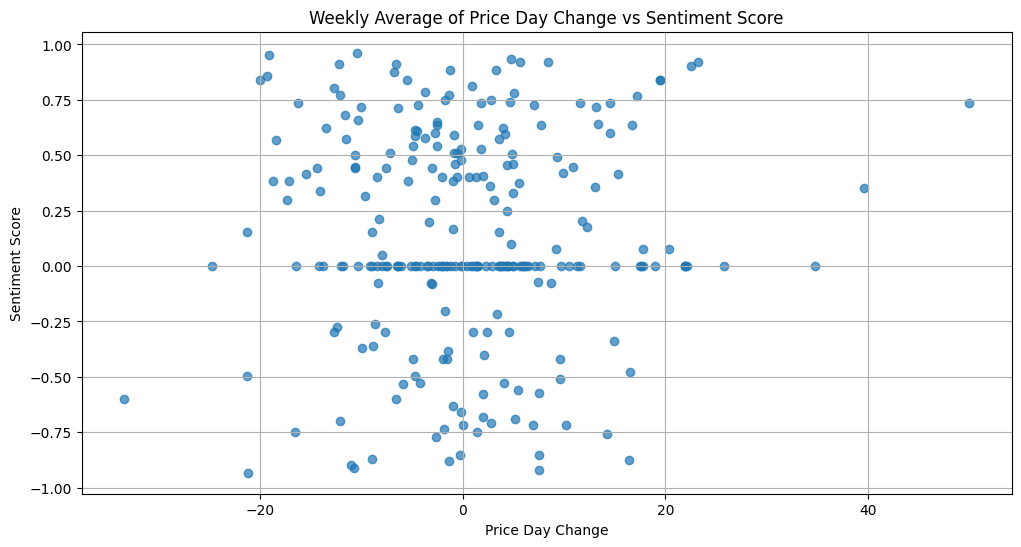

In [94]:
# Aggregating the data weekly and calculating the mean of Price_Day_Change and sentiment_score
weekly_data = final_df.resample('D').mean()

# Generating a scatter plot to visualize the relationship between weekly average of Price_Day_Change and sentiment_score
plt.figure(figsize=(12, 6))
plt.scatter(weekly_data['Price_Day_Change'], weekly_data['sentiment_score'], alpha=0.7)
plt.title('Weekly Average of Price Day Change vs Sentiment Score')
plt.xlabel('Price Day Change')
plt.ylabel('Sentiment Score')
plt.grid(True)
plt.show()


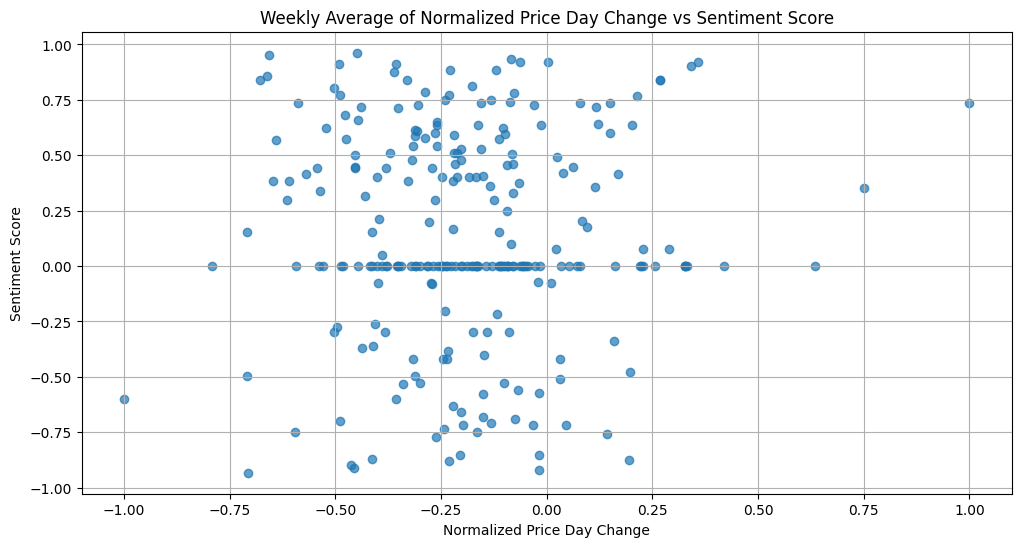

In [95]:
from sklearn.preprocessing import MinMaxScaler

# Normalizing the 'Price_Day_Change' column to be in the range [-1, 1]
scaler = MinMaxScaler(feature_range=(-1, 1))
final_df['Normalized_Price_Day_Change'] = scaler.fit_transform(final_df[['Price_Day_Change']])

# Aggregating the normalized data weekly
weekly_data_normalized = final_df.resample('D').mean()

# Generating a scatter plot for the normalized weekly data
plt.figure(figsize=(12, 6))
plt.scatter(weekly_data_normalized['Normalized_Price_Day_Change'], weekly_data_normalized['sentiment_score'], alpha=0.7)
plt.title('Weekly Average of Normalized Price Day Change vs Sentiment Score')
plt.xlabel('Normalized Price Day Change')
plt.ylabel('Sentiment Score')
plt.grid(True)
plt.show()


In [96]:
merged_data

,Open,High,Low,Close,Adj Close,Volume,Tweet Count,year_week,week of year,month,Price_Day_Change,Daily Change (%) Close - Close,Daily Change (%) Close - Open
Date,,,,,,,,,,,,,
2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,90,2021-39,39,9,1.839996,NaN,NaN
2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200,94,2021-39,39,10,1.059998,-0.033529,-0.007068
2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900,119,2021-40,40,10,4.989990,0.813962,-0.004085
2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800,88,2021-40,40,10,1.403351,-0.120285,-0.018795
2021-10-06,258.733337,262.220001,257.739990,260.916656,260.916656,43898400,78,2021-40,40,10,-2.183319,0.276714,-0.005364
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-23,283.089996,284.500000,272.820007,275.329987,275.329987,63748400,86,2022-38,38,9,7.760010,-4.594757,-0.037584
2022-09-26,271.829987,284.089996,270.309998,276.010010,276.010010,58076900,72,2022-39,39,9,-4.180023,0.246985,-0.027412
2022-09-27,283.839996,288.670013,277.510010,282.940002,282.940002,61925200,85,2022-39,39,9,0.899994,2.510776,0.015377


In [97]:
final_df

,Close,Price_Day_Change,sentiment_score,Daily Change (%) Close - Close,Daily Change (%) Close - Open,Normalized_Price_Day_Change
Date,,,,,,
2021-10-01,258.406677,1.059998,-0.2960,-0.033529,-0.007068,-0.173108
2021-10-04,260.510010,4.989990,0.0000,0.813962,-0.004085,-0.078969
2021-10-05,260.196655,1.403351,0.0000,-0.120285,-0.018795,-0.164883
2021-10-06,260.916656,-2.183319,0.0000,0.276714,-0.005364,-0.250798
2021-10-07,264.536682,-2.716675,0.2975,1.387426,0.008438,-0.263574
...,...,...,...,...,...,...
2022-09-23,275.329987,7.760010,0.6369,-4.594757,-0.037584,-0.012616
2022-09-26,276.010010,-4.180023,0.0000,0.246985,-0.027412,-0.298627
2022-09-27,282.940002,0.899994,0.8118,2.510776,0.015377,-0.176941


In [98]:
from sklearn.preprocessing import MinMaxScaler

# Assuming 'merged_data' contains the 'Average_Sentiment' column
scaler = MinMaxScaler(feature_range=(-1, 1))

# Reshape data for the scaler
data_to_scale = final_df['sentiment_score'].values.reshape(-1, 1)

# Scale the data
final_df['Scaled Average Sentiment'] = scaler.fit_transform(data_to_scale)

# Now 'Scaled Average Sentiment' is in the range of -1 to 1

# Reshape data for the scaler
data_to_scale = final_df['Daily Change (%) Close - Close'].values.reshape(-1, 1)

# Scale the data
final_df['Scaled Daily Change (%) Close - Close'] = scaler.fit_transform(data_to_scale)

# Reshape data for the scaler
data_to_scale = final_df['Daily Change (%) Close - Open '].values.reshape(-1, 1)

# Scale the data
final_df['Scaled Daily Change (%) Close - Open '] = scaler.fit_transform(data_to_scale)

# Now you can compare 'Scaled Daily Change (%)' with sentiment scores

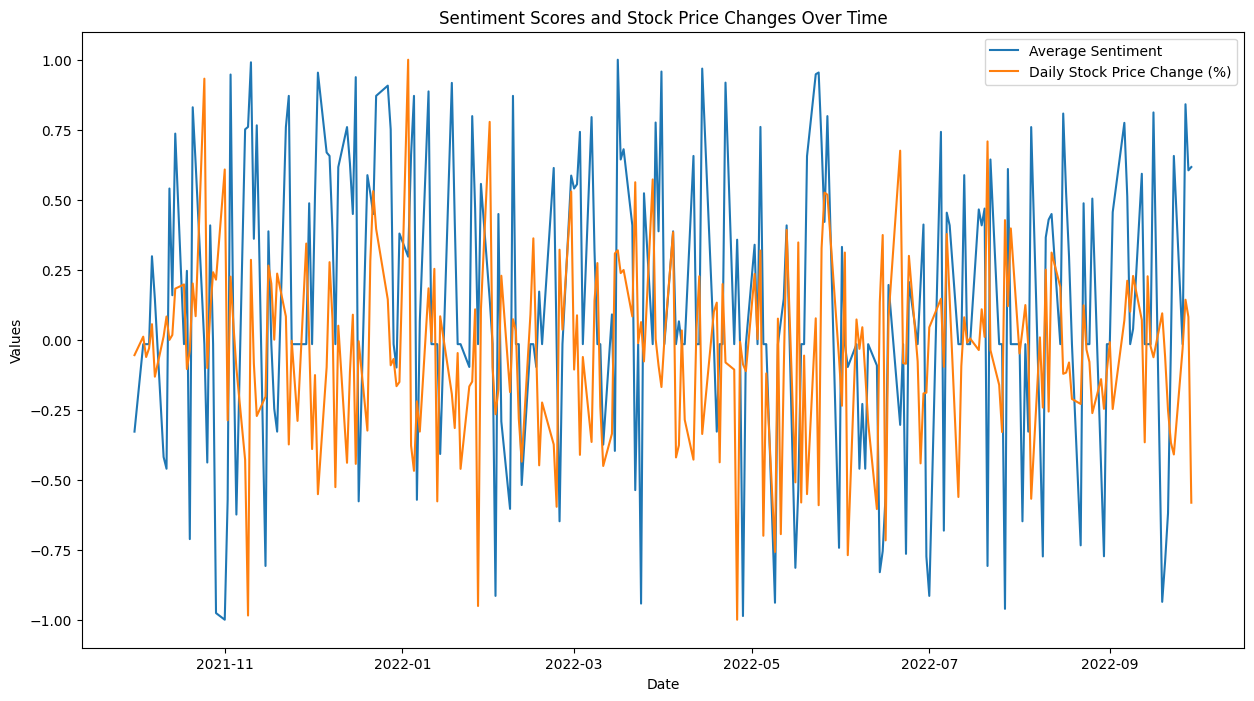

In [99]:
# Assuming 'merged_data' contains both sentiment scores and stock price changes
# Plotting sentiment scores and stock price changes over time
plt.figure(figsize=(15, 8))
plt.plot(final_df.index, final_df['Scaled Average Sentiment'], label='Average Sentiment')
plt.plot(final_df.index, final_df['Scaled Daily Change (%) Close - Close'], label='Daily Stock Price Change (%)')
plt.title('Sentiment Scores and Stock Price Changes Over Time')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.show()

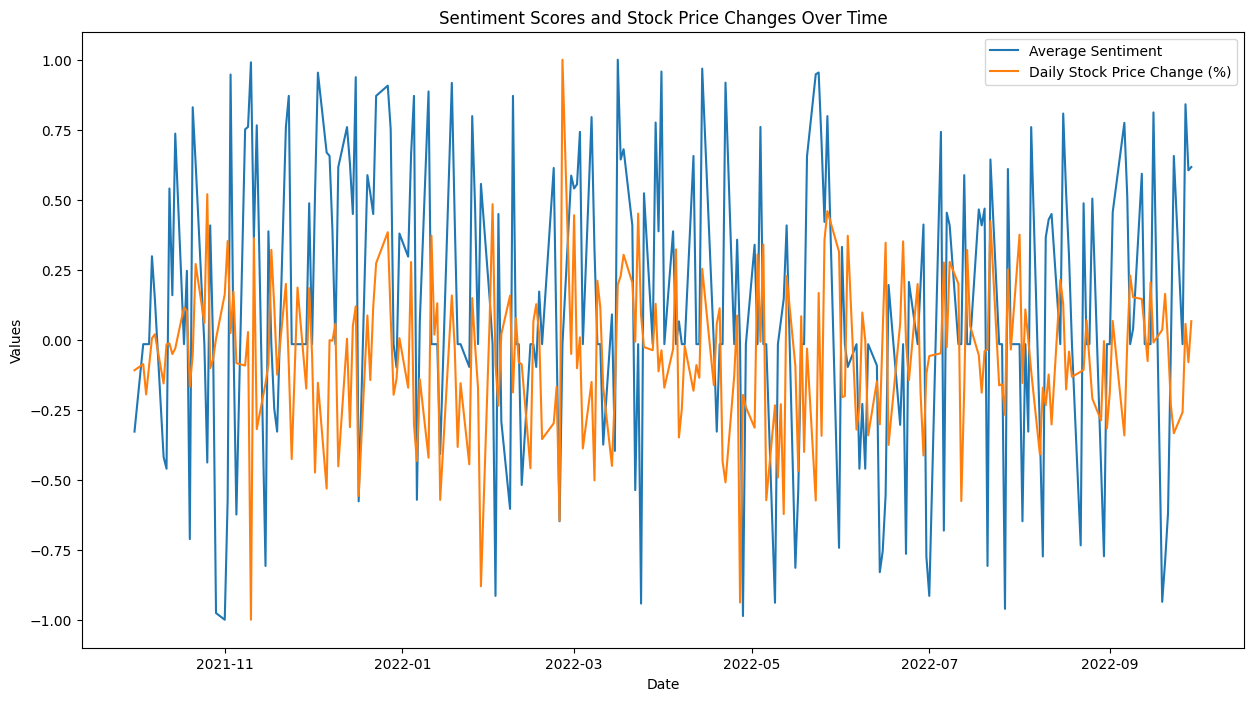

In [100]:
# Assuming 'merged_data' contains both sentiment scores and stock price changes
# Plotting sentiment scores and stock price changes over time
plt.figure(figsize=(15, 8))
plt.plot(final_df.index, final_df['Scaled Average Sentiment'], label='Average Sentiment')
plt.plot(final_df.index, final_df['Scaled Daily Change (%) Close - Open '], label='Daily Stock Price Change (%)')
plt.title('Sentiment Scores and Stock Price Changes Over Time')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.show()

In [101]:
final_df.dtypes

Close                                    float64
Price_Day_Change                         float64
sentiment_score                          float64
Daily Change (%) Close - Close           float64
Daily Change (%) Close - Open            float64
Normalized_Price_Day_Change              float64
Scaled Average Sentiment                 float64
Scaled Daily Change (%) Close - Close    float64
Scaled Daily Change (%) Close - Open     float64
dtype: object

In [102]:
final_df.corr()['sentiment_score']

Close                                    0.137806
Price_Day_Change                         0.030942
sentiment_score                          1.000000
Daily Change (%) Close - Close          -0.022365
Daily Change (%) Close - Open            0.021072
Normalized_Price_Day_Change              0.030942
Scaled Average Sentiment                 1.000000
Scaled Daily Change (%) Close - Close   -0.022365
Scaled Daily Change (%) Close - Open     0.021072
Name: sentiment_score, dtype: float64

Null hypothesis: The Close price of stocks is not correlated with the sentiment_Score.

Alternate hypothesis: The Close price of stocks is positevly correlated with the sentiment_Score.

In [103]:
corr, p_value = pearsonr(final_df['Close'], final_df['sentiment_score'])
alpha = 0.05
print(f"Pearson Correlation Coefficient: {corr}")
print(f"p_score:{p_value}")

Pearson Correlation Coefficient: 0.13780647021518797
p_score:0.029051140772400414


In [104]:
corr, p_value = pearsonr(final_df['Price_Day_Change'], final_df['sentiment_score'])
alpha = 0.05
print(f"Pearson Correlation Coefficient: {corr}")
print(f"p_score:{p_value}")

Pearson Correlation Coefficient: 0.03094202986529361
p_score:0.6256320980981538


In [105]:
corr, p_value = pearsonr(final_df['Daily Change (%) Close - Close'], final_df['sentiment_score'])
alpha = 0.05
print(f"Pearson Correlation Coefficient: {corr}")
print(f"p_score:{p_value}")

Pearson Correlation Coefficient: -0.022365351335301386
p_score:0.7243814025950853


In [106]:
corr, p_value = pearsonr(final_df['Daily Change (%) Close - Open '], final_df['sentiment_score'])
alpha = 0.05
print(f"Pearson Correlation Coefficient: {corr}")
print(f"p_score:{p_value}")

Pearson Correlation Coefficient: 0.021072433255945384
p_score:0.7397226887690623


In [107]:
corr, p_value = pearsonr(final_df['Normalized_Price_Day_Change'], final_df['sentiment_score'])
alpha = 0.05
print(f"Pearson Correlation Coefficient: {corr}")
print(f"p_score:{p_value}")

Pearson Correlation Coefficient: 0.03094202986529363
p_score:0.6256320980981538


In [108]:
final_df = merged_data.copy()

In [109]:
tesla_tweets_sentiment = tesla_tweets_sentiment.groupby('Date')['sentiment_score'].mean()

In [110]:
final_df = final_df.merge(tesla_tweets_sentiment, on="Date", how='left')

In [111]:
final_df = final_df[['Close','sentiment_score']]

In [112]:
# final_df = final_df.drop(columns=['Normalized_Price_Day_Change','Scaled Average Sentiment','Scaled Daily Change (%) Close - Close','Scaled Daily Change (%) Close - Open ','Price_Day_Change','Daily Change (%) Close - Close','Daily Change (%) Close - Open '])

In [113]:
final_df

,Close,sentiment_score
Date,,
2021-09-30,258.493347,0.6590
2021-10-01,258.406677,-0.2960
2021-10-04,260.510010,0.0000
2021-10-05,260.196655,0.0000
2021-10-06,260.916656,0.0000
...,...,...
2022-09-23,275.329987,0.6369
2022-09-26,276.010010,0.0000
2022-09-27,282.940002,0.8118


In [114]:
final_df = final_df.reset_index()

In [115]:
final_df

,Date,Close,sentiment_score
0,2021-09-30,258.493347,0.6590
1,2021-10-01,258.406677,-0.2960
2,2021-10-04,260.510010,0.0000
3,2021-10-05,260.196655,0.0000
4,2021-10-06,260.916656,0.0000
...,...,...,...
247,2022-09-23,275.329987,0.6369
248,2022-09-26,276.010010,0.0000
249,2022-09-27,282.940002,0.8118
250,2022-09-28,287.809998,0.5882


In [116]:
final_df['sentiment_score'].isnull().value_counts()

sentiment_score
False    252
Name: count, dtype: int64

In [117]:
# Time Series Model

In [118]:
X = final_df[['Date','sentiment_score']]
Y = final_df['Close']

In [119]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=.2,random_state=40)

<Figure size 1000x400 with 0 Axes>

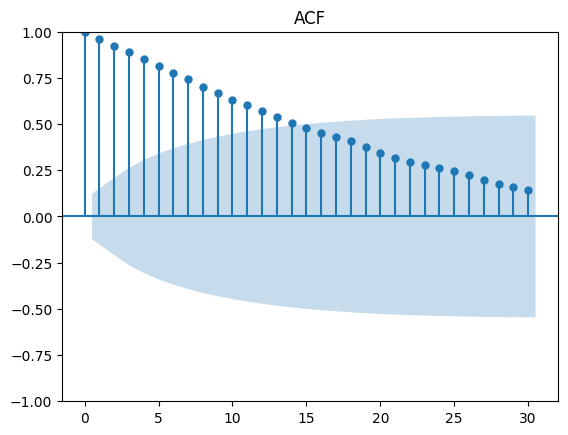

<Figure size 1000x400 with 0 Axes>

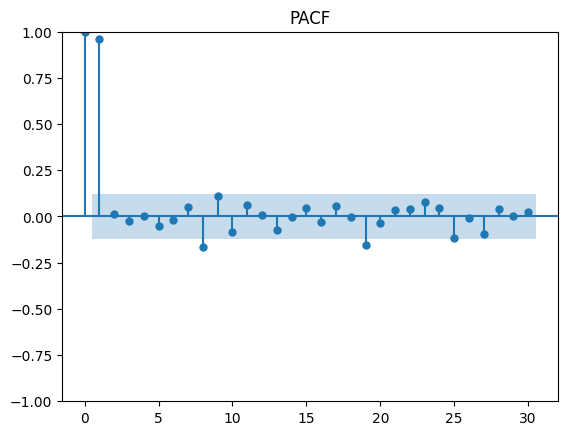

In [120]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assuming train_ts is a pandas Series or DataFrame with a datetime index
# If it's a DataFrame, you may need to select the specific column, e.g., train_ts['column_name']
train_ts = ...

# Create the ACF plot
plt.figure(figsize=(10, 4))
plot_acf(final_df['Close'], lags=30, title="ACF")
plt.show()

# Create the PACF plot
plt.figure(figsize=(10, 4))
plot_pacf(final_df['Close'], lags=30, title="PACF")
plt.show()


In [121]:
!pip install pmdarima

  Obtaining dependency information for pmdarima from https://files.pythonhosted.org/packages/ec/2b/e7d18360d56396b62781ba4616527af49244d4bed51f0780646fa3953cc8/pmdarima-2.0.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 21.9 MB/s eta 0:00:00


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  201
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -798.181
Date:                Fri, 01 Dec 2023   AIC                           1598.362
Time:                        21:00:13   BIC                           1601.660
Sample:                             0   HQIC                          1599.696
                                - 201                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       171.3967     13.169     13.015      0.000     145.586     197.207
Ljung-Box (L1) (Q):                   0.15   Jarque-Bera (JB):                16.56
Prob(Q):                              0.70   Pr

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


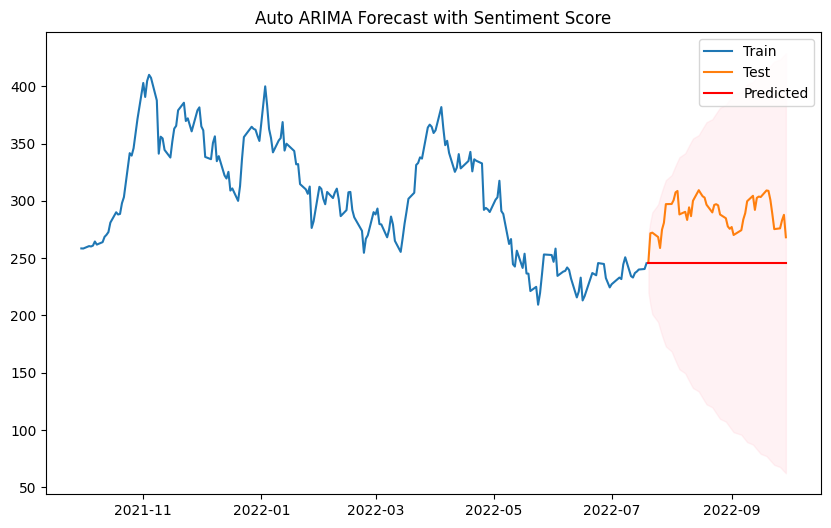

In [122]:
import pandas as pd
from pmdarima import auto_arima
import matplotlib.pyplot as plt

# Assuming your DataFrame is named final_df and has columns 'date', 'close', and 'sentiment_score'
# Adjust column names accordingly if they are different in your DataFrame

# Load your data (replace 'your_data.csv' with your actual file or data source)
# final_df = pd.read_csv('your_data.csv')

# Ensure 'date' column is in datetime format
final_df['Date'] = pd.to_datetime(final_df['Date'])

# Set 'date' as the index
final_df.set_index('Date', inplace=True)

# Extract the relevant columns
data = final_df[['Close', 'sentiment_score']]

# Split the data into training and testing sets
train_size = int(len(data) * 0.8)
train, test = data.iloc[:train_size], data.iloc[train_size:]

# Fit the Auto ARIMA model
model = auto_arima(train['Close'], exogenous=train[['sentiment_score']])

# Print the model summary
print(model.summary())

# Make predictions on the test set
predictions, conf_int = model.predict(n_periods=len(test), exogenous=test[['sentiment_score']], return_conf_int=True)

# Create a DataFrame to compare actual vs predicted values
results = pd.DataFrame({'Actual': test['Close'].values, 'Predicted': predictions, 'Lower_CI': conf_int[:, 0], 'Upper_CI': conf_int[:, 1]})
print(results)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['Close'], label='Train')
plt.plot(test.index, test['Close'], label='Test')
plt.plot(test.index, predictions, label='Predicted', color='red')
plt.fill_between(test.index, conf_int[:, 0], conf_int[:, 1], color='pink', alpha=0.2)
plt.legend()
plt.title('Auto ARIMA Forecast with Sentiment Score')
plt.show()

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/conda/lib/pyth

Mean Squared Error: 489.3092679261333


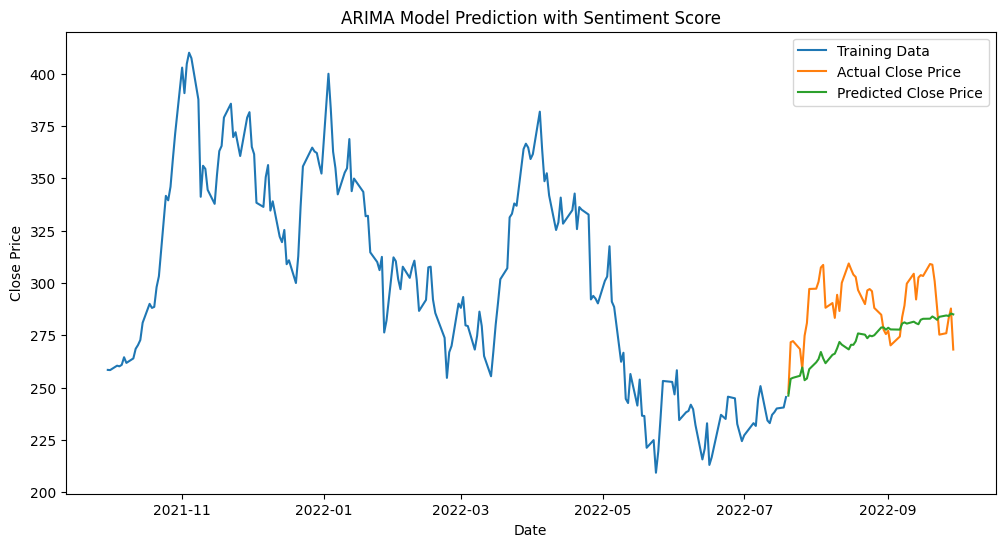

In [123]:
#kallal's ji fav.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming final_df is your DataFrame with 'date', 'close', and 'sentiment_score' columns
# If the DataFrame doesn't have a datetime index, set it using:
# final_df['date'] = pd.to_datetime(final_df['date'])
# final_df.set_index('date', inplace=True)

# Step 1: Prepare the data
data = final_df[['Close', 'sentiment_score']].copy()

# Step 2: Split the data into training and testing sets
train_size = int(len(data) * 0.8)
train, test = data.iloc[:train_size], data.iloc[train_size:]

# Step 3: Fit ARIMA model
order = (7,1,15)  # You may need to tune these parameters based on your data
model = ARIMA(train['Close'], order=order, exog=train['sentiment_score'])
fit_model = model.fit()

# Step 4: Predict on the test set
predictions = fit_model.forecast(steps=len(test), exog=test['sentiment_score'])

# Step 5: Evaluate the model
mse = mean_squared_error(test['Close'], predictions)
print(f'Mean Squared Error: {mse}')

# Step 6: Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Close'], label='Training Data')
plt.plot(test.index, test['Close'], label='Actual Close Price')
plt.plot(test.index, predictions, label='Predicted Close Price')
plt.title('ARIMA Model Prediction with Sentiment Score')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/conda/lib/pyth

Mean Squared Error: 489.3092679261333
Mean Absolute Percentage Error (MAPE): nan%


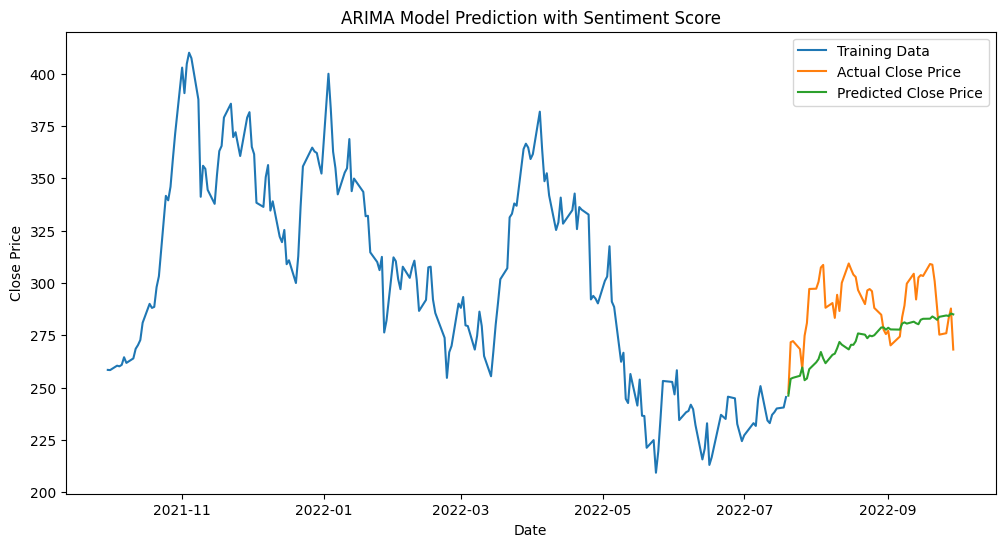

In [124]:
# Assuming final_df is your DataFrame with 'date', 'close', and 'sentiment_score' columns
# If the DataFrame doesn't have a datetime index, set it using:
# final_df['date'] = pd.to_datetime(final_df['date'])
# final_df.set_index('date', inplace=True)

# Step 1: Prepare the data
data = final_df[['Close', 'sentiment_score']].copy()  # Replace 'Close' with the correct column name

# Step 2: Split the data into training and testing sets
train_size = int(len(data) * 0.8)
train, test = data.iloc[:train_size], data.iloc[train_size:]

# Step 3: Fit ARIMA model
order = (7, 1, 15)  # You may need to tune these parameters based on your data
model = ARIMA(train['Close'], order=order, exog=train['sentiment_score'])
fit_model = model.fit()

# Step 4: Predict on the test set
predictions = fit_model.forecast(steps=len(test), exog=test['sentiment_score'])

# Step 5: Evaluate the model
mse = mean_squared_error(test['Close'], predictions)
mape = np.mean(np.abs((test['Close'] - predictions) / test['Close'])) * 100
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

# Step 6: Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Close'], label='Training Data')
plt.plot(test.index, test['Close'], label='Actual Close Price')
plt.plot(test.index, predictions, label='Predicted Close Price')
plt.title('ARIMA Model Prediction with Sentiment Score')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.83762D+00    |proj g|=  8.20236D-02

At iterate    5    f=  3.80674D+00    |proj g|=  2.77479D-02

At iterate   10    f=  3.80177D+00    |proj g|=  1.83306D-03

At iterate   15    f=  3.80171D+00    |proj g|=  1.53218D-03

At iterate   20    f=  3.80168D+00    |proj g|=  5.94578D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     20     22      1     0     0   5.946D-06   3.802D+00
  F =   3.8016780174072351     

CONVERG

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


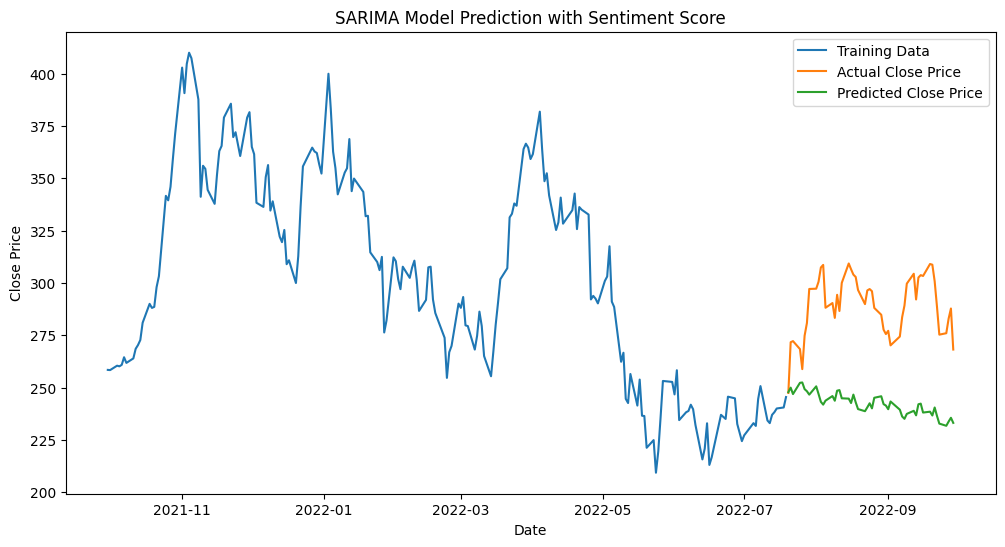

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming final_df is your DataFrame with 'date', 'close', and 'sentiment_score' columns
# If the DataFrame doesn't have a datetime index, set it using:
# final_df['date'] = pd.to_datetime(final_df['date'])
# final_df.set_index('date', inplace=True)

# Step 1: Prepare the data
data = final_df[['Close', 'sentiment_score']].copy()

# Step 2: Split the data into training and testing sets
train_size = int(len(data) * 0.8)
train, test = data.iloc[:train_size], data.iloc[train_size:]

# Step 3: Fit SARIMA model
order = (0, 1, 0)  # You may need to tune these parameters based on your data
seasonal_order = (1, 1, 1, 12)  # This is a typical seasonal order for monthly data
model = SARIMAX(train['Close'], order=order, seasonal_order=seasonal_order, exog=train['sentiment_score'])
fit_model = model.fit()

# Step 4: Predict on the test set
predictions = fit_model.get_forecast(steps=len(test), exog=test['sentiment_score']).predicted_mean

# Step 5: Evaluate the model
mse = mean_squared_error(test['Close'], predictions)
print(f'Mean Squared Error: {mse}')

# Step 6: Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Close'], label='Training Data')
plt.plot(test.index, test['Close'], label='Actual Close Price')
plt.plot(test.index, predictions, label='Predicted Close Price')
plt.title('SARIMA Model Prediction with Sentiment Score')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


In [126]:
final_df = final_df.reset_index()

In [127]:
# import pandas as pd
# from prophet import Prophet
# import matplotlib.pyplot as plt

# # Assuming final_df is your DataFrame with 'date', 'close', and 'sentiment_score' columns
# # If the DataFrame doesn't have a datetime index, set it using:
# # final_df['date'] = pd.to_datetime(final_df['date'])
# # final_df.set_index('date', inplace=True)

# # Step 1: Prepare the data
# data = final_df[['Date', 'Close', 'sentiment_score']].rename(columns={'Date': 'ds', 'Close': 'y'})

# # Step 2: Split the data into training and testing sets
# train_size = int(len(data) * 0.5)
# train, test = data.iloc[:train_size], data.iloc[train_size:]

# # Step 3: Fit Prophet model
# model = Prophet()
# model.add_regressor('sentiment_score')  # Add sentiment_score as a regressor
# model.fit(train)

# # Step 4: Create a dataframe with future dates
# future = model.make_future_dataframe(periods=len(test))
# future['sentiment_score'] = test['sentiment_score'].values  # Add sentiment_score values for the future dates

# # Step 5: Make predictions
# forecast = model.predict(future)

# # Step 6: Plot the results
# fig = model.plot(forecast)
# plt.title('Prophet Model Prediction with Sentiment Score')
# plt.xlabel('Date')
# plt.ylabel('Close Price')
# plt.show()


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.88865D+00    |proj g|=  3.70858D-02


 This problem is unconstrained.



At iterate    5    f=  3.82567D+00    |proj g|=  3.54534D-02

At iterate   10    f=  3.79782D+00    |proj g|=  2.20908D-02

At iterate   15    f=  3.79135D+00    |proj g|=  3.02958D-03

At iterate   20    f=  3.79078D+00    |proj g|=  1.52205D-03

At iterate   25    f=  3.79022D+00    |proj g|=  1.61618D-02

At iterate   30    f=  3.78855D+00    |proj g|=  1.91852D-03

At iterate   35    f=  3.78855D+00    |proj g|=  7.96042D-04

At iterate   40    f=  3.78852D+00    |proj g|=  3.61774D-04

At iterate   45    f=  3.78851D+00    |proj g|=  1.05414D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     45     63   

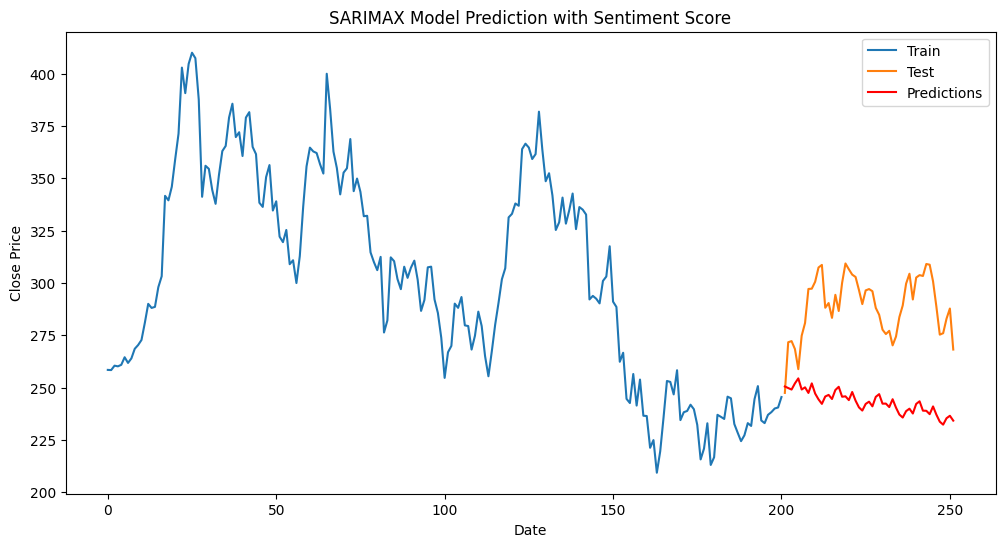

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Assuming final_df is your DataFrame with 'date', 'close', and 'sentiment_score' columns
# If the DataFrame doesn't have a datetime index, set it using:
# final_df['date'] = pd.to_datetime(final_df['date'])
# final_df.set_index('date', inplace=True)

# Prepare the data
data = final_df[['Close', 'sentiment_score']].sort_index()

# Split the data into training and testing sets
train_size = int(len(data) * 0.8)
train, test = data.iloc[:train_size], data.iloc[train_size:]

# Build and train the SARIMAX model
order = (1, 1, 1)  # Define the order parameter (p, d, q)
seasonal_order = (1, 1, 1, 12)  # Define the seasonal order parameter (P, D, Q, s)

# Fit the SARIMAX model
model = SARIMAX(endog=train['Close'], exog=train['sentiment_score'], order=order, seasonal_order=seasonal_order)
results = model.fit()

# Make predictions on the test set
predictions = results.get_forecast(steps=len(test), exog=test['sentiment_score']).predicted_mean

# Calculate and print the Mean Squared Error
mse = mean_squared_error(test['Close'], predictions)
print(f'Mean Squared Error: {mse}')

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train['Close'], label='Train')
plt.plot(test['Close'], label='Test')
plt.plot(predictions, label='Predictions', color='red')
plt.title('SARIMAX Model Prediction with Sentiment Score')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


<a id='hypothesis-tests'></a>
## 🔍 Hypothesis Tests
---

### Granularity: Daily

> Null hypothesis: Change in price is not correlated to Sentiment. 

> Alternate hypothesis: Change in price is correlated to Sentiment. 